In [457]:
from numpy import array
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [357]:
# Pickling Call Volume 2018 df
redo_pickle = False

if redo_pickle == True:
    with open('hourly_call_volume_medical_2018.pickle','wb') as f:
        pickle.dump(hourly_call_volume_medical_2018,f)
        
if redo_pickle == False:
    with open('hourly_call_volume_medical_2018.pickle','rb') as f:
        hourly_call_volume_medical_2018 = pickle.load(f)

### First Try at LSTM Growing Window

In [358]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [359]:
# Creating 80-20 train-test split
size = int(len(hourly_call_volume_medical_2018) * 0.8)
train, test = hourly_call_volume_medical_2018[0:size], hourly_call_volume_medical_2018[size:]

In [ ]:
# target_model.set_weights(model.get_weights()) 

In [390]:
# LSTM Growing window train validation - NOT WORKING WELL

# Creating train_train-train_val split
size = int(len(train) * 0.75)
train_train, train_val = train[:size], train[size:]

# Accumulator variable assignments
history = [x for x in train_train]
predictions = list()

# Loop for predicting the next value using previous data
for t in range(len(train_val)):
    
    # choose a number of time steps
    n_steps = 5
    # split into samples
    X, y = split_sequence(train_train, n_steps)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, batch_size=128, epochs=20)
        
    # Prediction
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
#     print(i,yhat)
    predictions.append(yhat)
    
    # Appending actual train_val observation to train_train data
    # so that on the next iteration, the model will train 
    # on all previous data and the next time step
    obs = train_val[t]
    history.append(obs)
    
    # Displaying predicted vs actual values
    print('predicted=%f, expected=%f' % (yhat, obs))

# # Calculating and printing MSE for all train_val predictions    
# error = mean_squared_error(train_val, predictions)
# print('train_val MSE: %.3f' % error)

Epoch 1/20
5248/5248 [==============================] - 4s 709us/step - loss: 128.5292
Epoch 2/20
5248/5248 [==============================] - 0s 44us/step - loss: 33.1892
Epoch 3/20
5248/5248 [==============================] - 0s 46us/step - loss: 25.1358
Epoch 4/20
5248/5248 [==============================] - 0s 47us/step - loss: 21.6926
Epoch 5/20
5248/5248 [==============================] - 0s 45us/step - loss: 20.2037
Epoch 6/20
5248/5248 [==============================] - 0s 46us/step - loss: 19.5264
Epoch 7/20
5248/5248 [==============================] - 0s 52us/step - loss: 19.3888
Epoch 8/20
5248/5248 [==============================] - 0s 45us/step - loss: 19.3061
Epoch 9/20
5248/5248 [==============================] - 0s 47us/step - loss: 19.0114
Epoch 10/20
5248/5248 [==============================] - 0s 47us/step - loss: 19.0054
Epoch 11/20
5248/5248 [==============================] - 0s 48us/step - loss: 18.9700
Epoch 12/20
5248/5248 [==============================] - 0s 4

5248/5248 [==============================] - 0s 43us/step - loss: 18.7391
Epoch 15/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.7665
Epoch 16/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.7299
Epoch 17/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.6843
Epoch 18/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.6869
Epoch 19/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.7583
Epoch 20/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.7020
predicted=14.448098, expected=5.000000
Epoch 1/20
5248/5248 [==============================] - 4s 779us/step - loss: 105.3080
Epoch 2/20
5248/5248 [==============================] - 0s 46us/step - loss: 32.6176
Epoch 3/20
5248/5248 [==============================] - 0s 45us/step - loss: 21.9761
Epoch 4/20
5248/5248 [==============================] - 0s 43us/step - loss: 19.7843
Epoch 5/20
5248/5248 [=======

5248/5248 [==============================] - 0s 50us/step - loss: 19.2606
Epoch 8/20
5248/5248 [==============================] - 0s 44us/step - loss: 19.1328
Epoch 9/20
5248/5248 [==============================] - 0s 46us/step - loss: 19.0576
Epoch 10/20
5248/5248 [==============================] - 0s 44us/step - loss: 19.1267
Epoch 11/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.9826
Epoch 12/20
5248/5248 [==============================] - 0s 44us/step - loss: 19.0281
Epoch 13/20
5248/5248 [==============================] - 0s 45us/step - loss: 18.8521
Epoch 14/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.7940
Epoch 15/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.9072
Epoch 16/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.9162
Epoch 17/20
5248/5248 [==============================] - 0s 43us/step - loss: 18.9087
Epoch 18/20
5248/5248 [==============================] - 0s 44us/ste

5248/5248 [==============================] - 0s 45us/step - loss: 18.5458
predicted=13.323720, expected=17.000000
Epoch 1/20
5248/5248 [==============================] - 5s 906us/step - loss: 60.8120
Epoch 2/20
5248/5248 [==============================] - 0s 46us/step - loss: 24.9301
Epoch 3/20
5248/5248 [==============================] - 0s 46us/step - loss: 21.5501
Epoch 4/20
5248/5248 [==============================] - 0s 45us/step - loss: 20.0971
Epoch 5/20
5248/5248 [==============================] - 0s 44us/step - loss: 19.4561
Epoch 6/20
5248/5248 [==============================] - 0s 45us/step - loss: 19.1377
Epoch 7/20
5248/5248 [==============================] - 0s 46us/step - loss: 18.9917
Epoch 8/20
5248/5248 [==============================] - 0s 44us/step - loss: 18.8926
Epoch 9/20
5248/5248 [==============================] - 0s 49us/step - loss: 18.8799
Epoch 10/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.7670
Epoch 11/20
5248/5248 [===========

5248/5248 [==============================] - 0s 56us/step - loss: 19.0388
Epoch 14/20
5248/5248 [==============================] - 0s 52us/step - loss: 18.9318
Epoch 15/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.9080
Epoch 16/20
5248/5248 [==============================] - 0s 50us/step - loss: 18.7426
Epoch 17/20
5248/5248 [==============================] - 0s 52us/step - loss: 18.7572
Epoch 18/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.7343
Epoch 19/20
5248/5248 [==============================] - 0s 50us/step - loss: 18.6952
Epoch 20/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.5968
predicted=13.527997, expected=12.000000
Epoch 1/20
5248/5248 [==============================] - 5s 978us/step - loss: 61.6691
Epoch 2/20
5248/5248 [==============================] - 0s 49us/step - loss: 25.1779
Epoch 3/20
5248/5248 [==============================] - 0s 48us/step - loss: 20.7400
Epoch 4/20
5248/5248 [======

5248/5248 [==============================] - 0s 50us/step - loss: 19.2238
Epoch 7/20
5248/5248 [==============================] - 0s 48us/step - loss: 19.1809
Epoch 8/20
5248/5248 [==============================] - 0s 54us/step - loss: 19.0685
Epoch 9/20
5248/5248 [==============================] - 0s 49us/step - loss: 18.8582
Epoch 10/20
5248/5248 [==============================] - 0s 50us/step - loss: 18.9548
Epoch 11/20
5248/5248 [==============================] - 0s 49us/step - loss: 18.8455
Epoch 12/20
5248/5248 [==============================] - 0s 50us/step - loss: 19.1630
Epoch 13/20
5248/5248 [==============================] - 0s 50us/step - loss: 18.8163
Epoch 14/20
5248/5248 [==============================] - 0s 50us/step - loss: 18.7059
Epoch 15/20
5248/5248 [==============================] - 0s 49us/step - loss: 18.6229
Epoch 16/20
5248/5248 [==============================] - 0s 49us/step - loss: 18.7369
Epoch 17/20
5248/5248 [==============================] - 0s 49us/step

5248/5248 [==============================] - 0s 55us/step - loss: 18.9017
Epoch 20/20
5248/5248 [==============================] - 0s 52us/step - loss: 18.7294
predicted=14.329592, expected=12.000000
Epoch 1/20
5248/5248 [==============================] - 6s 1ms/step - loss: 101.4420
Epoch 2/20
5248/5248 [==============================] - 0s 50us/step - loss: 30.1317
Epoch 3/20
5248/5248 [==============================] - 0s 51us/step - loss: 23.0650
Epoch 4/20
5248/5248 [==============================] - 0s 50us/step - loss: 21.2734
Epoch 5/20
5248/5248 [==============================] - 0s 50us/step - loss: 20.2080
Epoch 6/20
5248/5248 [==============================] - 0s 50us/step - loss: 19.9564
Epoch 7/20
5248/5248 [==============================] - 0s 50us/step - loss: 19.2762
Epoch 8/20
5248/5248 [==============================] - 0s 51us/step - loss: 19.1965
Epoch 9/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.9671
Epoch 10/20
5248/5248 [============

5248/5248 [==============================] - 0s 57us/step - loss: 18.6712
Epoch 13/20
5248/5248 [==============================] - 0s 53us/step - loss: 18.6372
Epoch 14/20
5248/5248 [==============================] - 0s 59us/step - loss: 18.5573
Epoch 15/20
5248/5248 [==============================] - 0s 55us/step - loss: 18.6173
Epoch 16/20
5248/5248 [==============================] - 0s 54us/step - loss: 18.5606
Epoch 17/20
5248/5248 [==============================] - 0s 52us/step - loss: 18.5538
Epoch 18/20
5248/5248 [==============================] - 0s 51us/step - loss: 18.5086
Epoch 19/20
5248/5248 [==============================] - 0s 53us/step - loss: 18.5434
Epoch 20/20
5248/5248 [==============================] - 0s 53us/step - loss: 18.5495
predicted=12.971759, expected=15.000000
Epoch 1/20
5248/5248 [==============================] - 6s 1ms/step - loss: 115.9560
Epoch 2/20
5248/5248 [==============================] - 0s 52us/step - loss: 36.2658
Epoch 3/20
5248/5248 [======

5248/5248 [==============================] - 0s 58us/step - loss: 19.6247
Epoch 6/20
5248/5248 [==============================] - 0s 57us/step - loss: 19.2140
Epoch 7/20
5248/5248 [==============================] - 0s 59us/step - loss: 19.1337
Epoch 8/20
5248/5248 [==============================] - 0s 56us/step - loss: 18.9882
Epoch 9/20
5248/5248 [==============================] - 0s 56us/step - loss: 18.9139
Epoch 10/20
5248/5248 [==============================] - 0s 56us/step - loss: 18.8507
Epoch 11/20
5248/5248 [==============================] - 0s 57us/step - loss: 18.8070
Epoch 12/20
5248/5248 [==============================] - 0s 57us/step - loss: 18.8516
Epoch 13/20
5248/5248 [==============================] - 0s 55us/step - loss: 18.6720
Epoch 14/20
5248/5248 [==============================] - 0s 57us/step - loss: 18.7878
Epoch 15/20
5248/5248 [==============================] - 0s 56us/step - loss: 18.7907
Epoch 16/20
5248/5248 [==============================] - 0s 55us/step 

5248/5248 [==============================] - 0s 58us/step - loss: 18.5711
Epoch 20/20
5248/5248 [==============================] - 0s 57us/step - loss: 18.5111
predicted=14.233428, expected=19.000000
Epoch 1/20
5248/5248 [==============================] - 7s 1ms/step - loss: 110.2500
Epoch 2/20
5248/5248 [==============================] - 0s 58us/step - loss: 29.7475
Epoch 3/20
5248/5248 [==============================] - 0s 58us/step - loss: 21.1079
Epoch 4/20
5248/5248 [==============================] - 0s 57us/step - loss: 20.2992
Epoch 5/20
5248/5248 [==============================] - 0s 57us/step - loss: 19.3856
Epoch 6/20
5248/5248 [==============================] - 0s 57us/step - loss: 19.1724
Epoch 7/20
5248/5248 [==============================] - 0s 57us/step - loss: 19.2020
Epoch 8/20
5248/5248 [==============================] - 0s 57us/step - loss: 19.0918
Epoch 9/20
5248/5248 [==============================] - 0s 57us/step - loss: 18.9000
Epoch 10/20
5248/5248 [============

5248/5248 [==============================] - 0s 59us/step - loss: 18.7048
Epoch 13/20
5248/5248 [==============================] - 0s 58us/step - loss: 18.7187
Epoch 14/20
5248/5248 [==============================] - 0s 60us/step - loss: 18.7919
Epoch 15/20
5248/5248 [==============================] - 0s 59us/step - loss: 18.6231
Epoch 16/20
5248/5248 [==============================] - 0s 59us/step - loss: 18.7585
Epoch 17/20
5248/5248 [==============================] - 0s 58us/step - loss: 18.6416
Epoch 18/20
5248/5248 [==============================] - 0s 58us/step - loss: 18.6418
Epoch 19/20
5248/5248 [==============================] - 0s 59us/step - loss: 18.5076
Epoch 20/20
5248/5248 [==============================] - 0s 58us/step - loss: 18.5251
predicted=12.038404, expected=15.000000
Epoch 1/20
5248/5248 [==============================] - 8s 1ms/step - loss: 111.8026
Epoch 2/20
5248/5248 [==============================] - 0s 60us/step - loss: 27.6370
Epoch 3/20
5248/5248 [======

5248/5248 [==============================] - 0s 61us/step - loss: 19.6167
Epoch 6/20
5248/5248 [==============================] - 0s 63us/step - loss: 19.1130
Epoch 7/20
5248/5248 [==============================] - 0s 62us/step - loss: 18.9553
Epoch 8/20
5248/5248 [==============================] - 0s 61us/step - loss: 18.9385
Epoch 9/20
5248/5248 [==============================] - 0s 61us/step - loss: 18.8096
Epoch 10/20
5248/5248 [==============================] - 0s 62us/step - loss: 18.8344
Epoch 11/20
5248/5248 [==============================] - 0s 61us/step - loss: 18.8033
Epoch 12/20
5248/5248 [==============================] - 0s 60us/step - loss: 18.7655
Epoch 13/20
5248/5248 [==============================] - 0s 61us/step - loss: 18.8769
Epoch 14/20
5248/5248 [==============================] - 0s 61us/step - loss: 18.7621
Epoch 15/20
5248/5248 [==============================] - 0s 62us/step - loss: 18.6566
Epoch 16/20
5248/5248 [==============================] - 0s 62us/step 

KeyboardInterrupt: 

In [399]:
# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test[5:],array(predictions).reshape((55)))
print('Test MSE: %.3f' % error)

Test MSE: 31.922


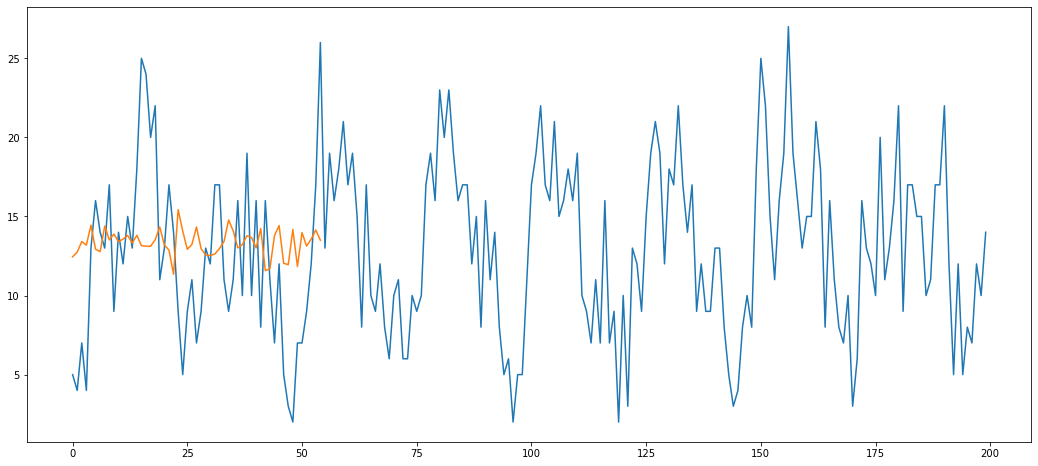

In [393]:
# Prediction
plt.figure(figsize=(18,8))
sns.lineplot(data=test[5:].values[:55])
sns.lineplot(data=array(predictions).reshape((55))[:55]);

### Running Single LSTM on 2018 data

In [476]:
# Creating 80-20 train-test split
size = int(len(hourly_call_volume_medical_2018) * 0.8)
train, test = hourly_call_volume_medical_2018[0:size], hourly_call_volume_medical_2018[size:]

In [477]:
# univariate lstm example

# choose a number of time steps
n_steps = 24
# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=False)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=1)

Epoch 1/1
6980/6980 [==============================] - 25s 4ms/step - loss: 24.8101


In [431]:
# # Train and validation set mse (checking for overfitting)
# plt.figure(figsize=(18,8))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [480]:
# Creating prediction for test set
predictions = []
for i in range(size,len(hourly_call_volume_medical_2018)-24):
    x_input = array(hourly_call_volume_medical_2018.values[i:i+24])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(i,yhat)
    predictions.append(yhat)

7004 [[13.041267]]
7005 [[12.04716]]
7006 [[11.179608]]
7007 [[11.128698]]
7008 [[10.557975]]
7009 [[8.5161915]]
7010 [[6.6879296]]
7011 [[6.700459]]
7012 [[7.444583]]
7013 [[8.485474]]
7014 [[9.19237]]
7015 [[11.223008]]
7016 [[12.473167]]
7017 [[13.406917]]
7018 [[14.039901]]
7019 [[14.161877]]
7020 [[13.179535]]
7021 [[12.550009]]
7022 [[13.588312]]
7023 [[13.823528]]
7024 [[14.530234]]
7025 [[14.014888]]
7026 [[13.651755]]
7027 [[12.148785]]
7028 [[11.702759]]
7029 [[11.48349]]
7030 [[9.701157]]
7031 [[8.810545]]
7032 [[7.7886157]]
7033 [[7.0743017]]
7034 [[7.214817]]
7035 [[8.100904]]
7036 [[9.361583]]
7037 [[11.111951]]
7038 [[12.876402]]
7039 [[14.340015]]
7040 [[15.507193]]
7041 [[15.591625]]
7042 [[15.546949]]
7043 [[15.708214]]
7044 [[15.827]]
7045 [[15.867378]]
7046 [[15.228463]]
7047 [[14.85406]]
7048 [[13.547936]]
7049 [[11.896784]]
7050 [[10.968291]]
7051 [[10.254692]]
7052 [[8.650282]]
7053 [[7.8867173]]
7054 [[7.063833]]
7055 [[6.304047]]
7056 [[6.761154]]
7057 [[8.2415

7448 [[17.02612]]
7449 [[17.41686]]
7450 [[17.375834]]
7451 [[17.142628]]
7452 [[16.782167]]
7453 [[16.551842]]
7454 [[15.462493]]
7455 [[14.754271]]
7456 [[14.050155]]
7457 [[13.055654]]
7458 [[10.648245]]
7459 [[8.895163]]
7460 [[7.992836]]
7461 [[7.9797435]]
7462 [[7.449413]]
7463 [[6.992085]]
7464 [[6.765183]]
7465 [[7.3251367]]
7466 [[7.9615355]]
7467 [[9.527166]]
7468 [[11.489521]]
7469 [[15.183762]]
7470 [[16.7497]]
7471 [[16.910847]]
7472 [[17.044004]]
7473 [[16.933985]]
7474 [[17.038553]]
7475 [[17.213945]]
7476 [[17.070717]]
7477 [[16.400267]]
7478 [[15.782317]]
7479 [[14.597218]]
7480 [[13.5510235]]
7481 [[12.185399]]
7482 [[11.612959]]
7483 [[11.337704]]
7484 [[10.795769]]
7485 [[9.731636]]
7486 [[8.308347]]
7487 [[7.1888347]]
7488 [[6.712947]]
7489 [[6.8710375]]
7490 [[7.84888]]
7491 [[8.748739]]
7492 [[11.292281]]
7493 [[12.165652]]
7494 [[13.367288]]
7495 [[15.937758]]
7496 [[14.880898]]
7497 [[15.112307]]
7498 [[15.700347]]
7499 [[15.130806]]
7500 [[15.518684]]
7501 [[1

7897 [[6.7852225]]
7898 [[8.062382]]
7899 [[9.534938]]
7900 [[10.411524]]
7901 [[12.414657]]
7902 [[14.398854]]
7903 [[14.955037]]
7904 [[15.983206]]
7905 [[16.7163]]
7906 [[16.95533]]
7907 [[16.813324]]
7908 [[16.216986]]
7909 [[15.735362]]
7910 [[15.576276]]
7911 [[14.156004]]
7912 [[13.24498]]
7913 [[12.072753]]
7914 [[11.527052]]
7915 [[10.719345]]
7916 [[9.524187]]
7917 [[9.44713]]
7918 [[7.969782]]
7919 [[7.114725]]
7920 [[7.402744]]
7921 [[7.456824]]
7922 [[7.9757566]]
7923 [[8.712915]]
7924 [[10.5206]]
7925 [[11.99952]]
7926 [[14.186016]]
7927 [[14.920171]]
7928 [[13.27668]]
7929 [[14.073042]]
7930 [[15.023194]]
7931 [[15.691458]]
7932 [[15.991998]]
7933 [[15.446649]]
7934 [[15.320208]]
7935 [[14.948153]]
7936 [[13.813729]]
7937 [[13.82642]]
7938 [[12.4155035]]
7939 [[11.145174]]
7940 [[11.334551]]
7941 [[10.756268]]
7942 [[9.382081]]
7943 [[7.6202645]]
7944 [[6.488176]]
7945 [[6.4180155]]
7946 [[7.0778365]]
7947 [[8.449403]]
7948 [[10.565225]]
7949 [[11.419958]]
7950 [[12.8307

8351 [[8.459915]]
8352 [[8.109388]]
8353 [[7.384449]]
8354 [[7.5058894]]
8355 [[8.183126]]
8356 [[9.767004]]
8357 [[11.78127]]
8358 [[12.619869]]
8359 [[13.86499]]
8360 [[14.433594]]
8361 [[15.2362175]]
8362 [[15.30144]]
8363 [[15.172758]]
8364 [[14.688575]]
8365 [[14.29251]]
8366 [[13.22438]]
8367 [[12.450692]]
8368 [[11.356908]]
8369 [[11.2957]]
8370 [[11.931956]]
8371 [[12.185403]]
8372 [[11.470391]]
8373 [[10.555724]]
8374 [[9.266948]]
8375 [[9.044867]]
8376 [[8.395319]]
8377 [[7.7195334]]
8378 [[7.733305]]
8379 [[8.271385]]
8380 [[9.308129]]
8381 [[12.214642]]
8382 [[13.515736]]
8383 [[14.222225]]
8384 [[13.636039]]
8385 [[14.2303705]]
8386 [[14.994952]]
8387 [[15.00021]]
8388 [[14.474181]]
8389 [[14.856401]]
8390 [[15.0400305]]
8391 [[14.28368]]
8392 [[14.522073]]
8393 [[13.596898]]
8394 [[13.041552]]
8395 [[11.659096]]
8396 [[9.593891]]
8397 [[8.058776]]
8398 [[7.141521]]
8399 [[6.651179]]
8400 [[6.914796]]
8401 [[7.6178718]]
8402 [[8.309637]]
8403 [[8.641603]]
8404 [[11.342545]

In [481]:
predictions = array(predictions).reshape((len(predictions)))

In [482]:
# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test[24:],predictions)
print('Test MSE: %.3f' % error)

Test MSE: 16.528


In [ ]:
# check residuals for nonlinear trend then it will show if you need to use an rnn

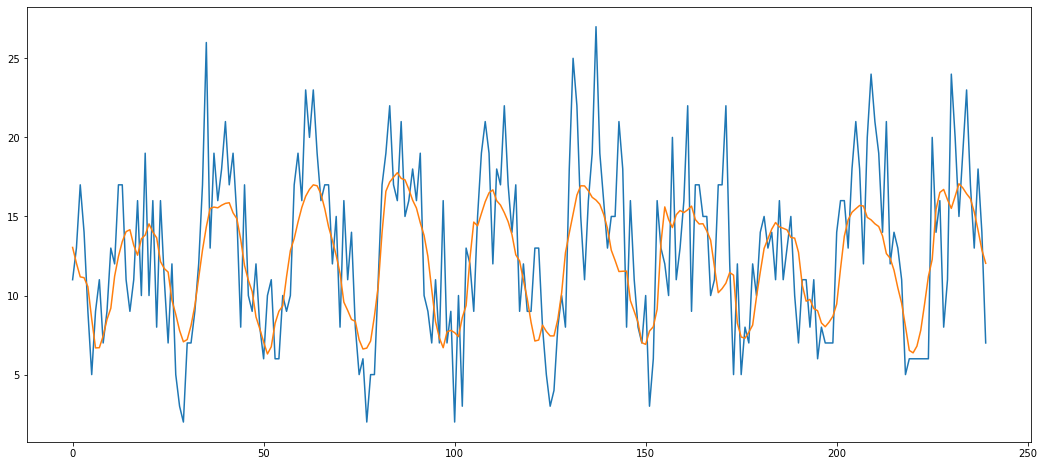

In [483]:
# Prediction
plt.figure(figsize=(18,8))
sns.lineplot(data=test[24:].values[:48*5])
sns.lineplot(data=predictions[:48*5]);

### Running Single LSTM on all years data

In [412]:
# Pickling All Call Volume df
redo_pickle = False

if redo_pickle == True:
    with open('hourly_call_volume_medical_all.pickle','wb') as f:
        pickle.dump(hourly_call_volume_medical_all,f)
        
if redo_pickle == False:
    with open('hourly_call_volume_medical_all.pickle','rb') as f:
        hourly_call_volume_medical_all = pickle.load(f)

In [514]:
# Creating 80-20 train-test split
size = int(len(hourly_call_volume_medical_all) * 0.8)
train, test = hourly_call_volume_medical_all[0:size], hourly_call_volume_medical_all[size:]

In [515]:
# univariate lstm example

# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=False)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
133696/133696 [==============================] - 92s 689us/step - loss: 13.9079
Epoch 2/10
133696/133696 [==============================] - 79s 592us/step - loss: 13.1606
Epoch 3/10
133696/133696 [==============================] - 79s 589us/step - loss: 13.0491
Epoch 4/10
133696/133696 [==============================] - 78s 581us/step - loss: 12.9695
Epoch 5/10
133696/133696 [==============================] - 77s 578us/step - loss: 12.8806
Epoch 6/10
133696/133696 [==============================] - 78s 585us/step - loss: 12.8309
Epoch 7/10
133696/133696 [==============================] - 80s 602us/step - loss: 12.8426
Epoch 8/10
133696/133696 [==============================] - 80s 599us/step - loss: 12.8093
Epoch 9/10
133696/133696 [==============================] - 82s 616us/step - loss: 12.7332
Epoch 10/10
133696/133696 [==============================] - 84s 625us/step - loss: 12.7012


In [431]:
# # Train and validation set mse (checking for overfitting)
# plt.figure(figsize=(18,8))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [292]:
# Retraining on all 80%

# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
6999/6999 [==============================] - 3s 400us/step - loss: 89.2061
Epoch 2/100
6999/6999 [==============================] - 0s 41us/step - loss: 26.7901
Epoch 3/100
6999/6999 [==============================] - 0s 41us/step - loss: 20.3927
Epoch 4/100
6999/6999 [==============================] - 0s 41us/step - loss: 19.0175
Epoch 5/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.7560
Epoch 6/100
6999/6999 [==============================] - 0s 43us/step - loss: 18.7266
Epoch 7/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.6523
Epoch 8/100
6999/6999 [==============================] - 0s 40us/step - loss: 18.4850
Epoch 9/100
6999/6999 [==============================] - 0s 41us/step - loss: 18.4917
Epoch 10/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.4052
Epoch 11/100
6999/6999 [==============================] - 0s 41us/step - loss: 18.3889
Epoch 12/100
6999/6999 [===========================

In [466]:
# Creating prediction for test set
predictions = []
for i in range(size,len(hourly_call_volume_medical_all)-6):
    x_input = array(hourly_call_volume_medical_all.values[i:i+6])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(i,yhat)
    predictions.append(yhat)

133702 [[9.372342]]
133703 [[11.578158]]
133704 [[12.833885]]
133705 [[12.765789]]
133706 [[13.094545]]
133707 [[12.860552]]
133708 [[13.379686]]
133709 [[12.965313]]
133710 [[13.350002]]
133711 [[12.402025]]
133712 [[12.203129]]
133713 [[11.2355795]]
133714 [[11.220749]]
133715 [[10.25268]]
133716 [[9.764089]]
133717 [[10.003014]]
133718 [[8.792291]]
133719 [[7.6650524]]
133720 [[6.437739]]
133721 [[5.0856605]]
133722 [[4.8964267]]
133723 [[5.334017]]
133724 [[6.100968]]
133725 [[7.753857]]
133726 [[11.40187]]
133727 [[12.892264]]
133728 [[12.942311]]
133729 [[12.972599]]
133730 [[13.34522]]
133731 [[13.092275]]
133732 [[13.558514]]
133733 [[13.9408245]]
133734 [[13.40223]]
133735 [[13.047697]]
133736 [[11.866254]]
133737 [[11.897431]]
133738 [[11.655962]]
133739 [[11.378866]]
133740 [[11.023743]]
133741 [[10.002608]]
133742 [[8.159095]]
133743 [[6.4652944]]
133744 [[6.3269777]]
133745 [[6.2286615]]
133746 [[5.268764]]
133747 [[5.818067]]
133748 [[7.7792683]]
133749 [[9.436696]]
13375

134103 [[8.096341]]
134104 [[7.159702]]
134105 [[6.848129]]
134106 [[5.5465097]]
134107 [[5.415669]]
134108 [[6.2626925]]
134109 [[8.098542]]
134110 [[9.979125]]
134111 [[11.566708]]
134112 [[13.276195]]
134113 [[13.540126]]
134114 [[13.148666]]
134115 [[12.867888]]
134116 [[14.493629]]
134117 [[13.528849]]
134118 [[13.299245]]
134119 [[12.471503]]
134120 [[11.966943]]
134121 [[10.924591]]
134122 [[11.074622]]
134123 [[11.046081]]
134124 [[10.274132]]
134125 [[9.7226715]]
134126 [[9.766056]]
134127 [[8.473808]]
134128 [[7.934844]]
134129 [[5.955477]]
134130 [[5.391882]]
134131 [[5.0993633]]
134132 [[6.2166243]]
134133 [[7.457766]]
134134 [[8.674626]]
134135 [[10.282123]]
134136 [[12.633747]]
134137 [[12.887254]]
134138 [[13.4046]]
134139 [[13.57308]]
134140 [[12.852421]]
134141 [[11.967037]]
134142 [[11.454292]]
134143 [[11.098689]]
134144 [[11.222243]]
134145 [[11.627344]]
134146 [[10.786295]]
134147 [[10.040131]]
134148 [[9.822521]]
134149 [[9.387219]]
134150 [[8.866338]]
134151 [[8.

134500 [[13.167377]]
134501 [[13.000396]]
134502 [[12.87829]]
134503 [[12.826895]]
134504 [[12.098261]]
134505 [[11.088569]]
134506 [[10.247159]]
134507 [[9.14077]]
134508 [[7.6808352]]
134509 [[6.317897]]
134510 [[5.85228]]
134511 [[4.7987432]]
134512 [[5.1309876]]
134513 [[5.9182544]]
134514 [[8.604686]]
134515 [[11.173348]]
134516 [[12.153307]]
134517 [[13.411184]]
134518 [[12.30373]]
134519 [[13.160168]]
134520 [[13.83699]]
134521 [[13.384623]]
134522 [[13.922482]]
134523 [[13.926152]]
134524 [[12.988529]]
134525 [[13.297697]]
134526 [[12.726348]]
134527 [[11.106545]]
134528 [[10.497393]]
134529 [[10.711787]]
134530 [[9.673928]]
134531 [[8.97656]]
134532 [[8.885782]]
134533 [[9.0178995]]
134534 [[7.8974905]]
134535 [[6.9803357]]
134536 [[5.900657]]
134537 [[5.4675517]]
134538 [[7.2898173]]
134539 [[8.855126]]
134540 [[10.35919]]
134541 [[12.102596]]
134542 [[13.314711]]
134543 [[13.163739]]
134544 [[13.649042]]
134545 [[13.827939]]
134546 [[14.5044775]]
134547 [[13.545073]]
134548 

134904 [[14.275637]]
134905 [[14.7137575]]
134906 [[13.857652]]
134907 [[13.265637]]
134908 [[13.349262]]
134909 [[13.552004]]
134910 [[13.465472]]
134911 [[12.885541]]
134912 [[11.598857]]
134913 [[10.817831]]
134914 [[10.969802]]
134915 [[9.931148]]
134916 [[8.038435]]
134917 [[6.7633553]]
134918 [[5.7342114]]
134919 [[5.608259]]
134920 [[5.918339]]
134921 [[8.728055]]
134922 [[9.376056]]
134923 [[9.232453]]
134924 [[10.997944]]
134925 [[11.860226]]
134926 [[12.366376]]
134927 [[13.307295]]
134928 [[13.5020895]]
134929 [[13.874039]]
134930 [[13.564131]]
134931 [[13.755086]]
134932 [[13.906926]]
134933 [[12.474532]]
134934 [[11.818565]]
134935 [[11.745213]]
134936 [[11.663787]]
134937 [[11.371467]]
134938 [[10.7703905]]
134939 [[9.525663]]
134940 [[8.645608]]
134941 [[8.7552595]]
134942 [[9.000467]]
134943 [[9.135916]]
134944 [[7.643417]]
134945 [[6.0424566]]
134946 [[6.4238214]]
134947 [[7.9884768]]
134948 [[8.4639]]
134949 [[9.084533]]
134950 [[11.462947]]
134951 [[12.891901]]
13495

135308 [[9.896511]]
135309 [[11.922819]]
135310 [[12.426625]]
135311 [[13.456071]]
135312 [[13.50278]]
135313 [[12.275102]]
135314 [[12.629377]]
135315 [[13.782463]]
135316 [[13.033106]]
135317 [[12.413931]]
135318 [[12.234814]]
135319 [[11.6580105]]
135320 [[10.04205]]
135321 [[9.695228]]
135322 [[8.52136]]
135323 [[8.211911]]
135324 [[8.793876]]
135325 [[9.434665]]
135326 [[7.2516155]]
135327 [[5.470704]]
135328 [[6.0249624]]
135329 [[7.342648]]
135330 [[8.464595]]
135331 [[10.056651]]
135332 [[10.526226]]
135333 [[11.700974]]
135334 [[13.375818]]
135335 [[12.40725]]
135336 [[12.678252]]
135337 [[13.468647]]
135338 [[13.309772]]
135339 [[12.315989]]
135340 [[12.537161]]
135341 [[11.281303]]
135342 [[11.648868]]
135343 [[12.0492735]]
135344 [[11.196567]]
135345 [[10.989134]]
135346 [[10.501328]]
135347 [[11.043334]]
135348 [[9.658221]]
135349 [[8.262484]]
135350 [[6.2553463]]
135351 [[6.2241545]]
135352 [[5.8033276]]
135353 [[7.236636]]
135354 [[8.796354]]
135355 [[9.441697]]
135356 [

135712 [[8.441028]]
135713 [[9.622056]]
135714 [[11.328155]]
135715 [[11.849351]]
135716 [[11.509847]]
135717 [[12.919326]]
135718 [[12.455455]]
135719 [[12.406939]]
135720 [[12.633179]]
135721 [[12.269023]]
135722 [[11.355703]]
135723 [[10.889403]]
135724 [[10.876271]]
135725 [[10.114281]]
135726 [[9.893258]]
135727 [[9.943642]]
135728 [[9.3431425]]
135729 [[8.198976]]
135730 [[8.469589]]
135731 [[8.913324]]
135732 [[7.750118]]
135733 [[6.3143735]]
135734 [[5.4729357]]
135735 [[5.3940783]]
135736 [[5.772155]]
135737 [[8.971466]]
135738 [[11.048835]]
135739 [[11.942325]]
135740 [[11.709048]]
135741 [[12.226005]]
135742 [[11.955873]]
135743 [[12.649973]]
135744 [[12.604013]]
135745 [[13.385757]]
135746 [[12.500304]]
135747 [[11.926755]]
135748 [[12.247504]]
135749 [[12.064602]]
135750 [[11.003145]]
135751 [[10.102944]]
135752 [[11.126228]]
135753 [[10.143661]]
135754 [[9.265429]]
135755 [[7.357853]]
135756 [[5.968185]]
135757 [[5.492417]]
135758 [[4.770989]]
135759 [[5.3143606]]
135760 

136119 [[6.319811]]
136120 [[6.972316]]
136121 [[7.6797276]]
136122 [[9.363816]]
136123 [[11.461935]]
136124 [[12.677344]]
136125 [[12.740298]]
136126 [[13.33576]]
136127 [[13.655634]]
136128 [[13.722115]]
136129 [[13.300725]]
136130 [[13.696807]]
136131 [[12.97491]]
136132 [[12.646793]]
136133 [[12.4149]]
136134 [[12.397093]]
136135 [[12.188155]]
136136 [[11.657175]]
136137 [[11.24473]]
136138 [[9.720011]]
136139 [[10.03792]]
136140 [[10.125846]]
136141 [[9.075442]]
136142 [[7.810765]]
136143 [[6.1883106]]
136144 [[5.8704395]]
136145 [[7.220188]]
136146 [[8.30634]]
136147 [[9.547051]]
136148 [[9.402346]]
136149 [[10.981148]]
136150 [[12.221048]]
136151 [[11.871884]]
136152 [[13.611726]]
136153 [[13.037142]]
136154 [[12.2601]]
136155 [[12.647792]]
136156 [[12.239805]]
136157 [[12.595183]]
136158 [[13.402454]]
136159 [[12.303619]]
136160 [[11.169558]]
136161 [[9.809773]]
136162 [[9.747196]]
136163 [[9.914715]]
136164 [[7.813678]]
136165 [[5.8192983]]
136166 [[4.9760604]]
136167 [[5.2929

136528 [[9.55581]]
136529 [[11.554017]]
136530 [[12.756916]]
136531 [[14.166]]
136532 [[13.376063]]
136533 [[13.190856]]
136534 [[13.340085]]
136535 [[13.13136]]
136536 [[13.311325]]
136537 [[13.438369]]
136538 [[13.451505]]
136539 [[12.577177]]
136540 [[12.971683]]
136541 [[12.00802]]
136542 [[11.37738]]
136543 [[10.921619]]
136544 [[10.169275]]
136545 [[9.640541]]
136546 [[7.676011]]
136547 [[5.503426]]
136548 [[5.74599]]
136549 [[6.4673133]]
136550 [[6.432064]]
136551 [[9.2901]]
136552 [[9.352929]]
136553 [[10.8283415]]
136554 [[11.302324]]
136555 [[12.546942]]
136556 [[12.594499]]
136557 [[13.3349695]]
136558 [[14.623095]]
136559 [[13.911833]]
136560 [[13.818897]]
136561 [[13.555983]]
136562 [[12.922925]]
136563 [[12.652985]]
136564 [[11.398698]]
136565 [[11.286942]]
136566 [[12.261255]]
136567 [[10.615135]]
136568 [[9.775071]]
136569 [[9.377335]]
136570 [[8.84751]]
136571 [[6.6636486]]
136572 [[5.076181]]
136573 [[4.9935565]]
136574 [[6.327648]]
136575 [[8.345981]]
136576 [[11.090

136934 [[5.1258698]]
136935 [[5.286124]]
136936 [[9.179723]]
136937 [[10.622842]]
136938 [[11.248252]]
136939 [[12.683795]]
136940 [[13.233818]]
136941 [[13.733434]]
136942 [[13.676876]]
136943 [[13.355409]]
136944 [[12.6818075]]
136945 [[12.729771]]
136946 [[12.917641]]
136947 [[13.280954]]
136948 [[13.277888]]
136949 [[14.849025]]
136950 [[12.570217]]
136951 [[11.184184]]
136952 [[11.025917]]
136953 [[10.533729]]
136954 [[9.851891]]
136955 [[8.959503]]
136956 [[9.266073]]
136957 [[8.8291235]]
136958 [[6.671044]]
136959 [[6.6686454]]
136960 [[7.8965483]]
136961 [[8.523956]]
136962 [[9.719691]]
136963 [[10.317575]]
136964 [[11.002092]]
136965 [[12.476677]]
136966 [[13.810862]]
136967 [[13.264637]]
136968 [[12.97597]]
136969 [[12.77014]]
136970 [[12.482947]]
136971 [[12.716958]]
136972 [[12.797622]]
136973 [[12.740123]]
136974 [[11.341734]]
136975 [[10.82635]]
136976 [[11.950811]]
136977 [[10.849842]]
136978 [[10.931389]]
136979 [[10.371571]]
136980 [[9.387459]]
136981 [[7.4438257]]
136

137343 [[10.494728]]
137344 [[11.453048]]
137345 [[11.8743725]]
137346 [[13.205069]]
137347 [[13.281755]]
137348 [[13.277148]]
137349 [[13.159562]]
137350 [[13.803967]]
137351 [[13.381389]]
137352 [[13.911144]]
137353 [[12.466902]]
137354 [[12.602255]]
137355 [[11.910706]]
137356 [[11.171509]]
137357 [[11.028688]]
137358 [[9.517934]]
137359 [[9.155434]]
137360 [[8.220256]]
137361 [[7.2610197]]
137362 [[5.931759]]
137363 [[4.895667]]
137364 [[5.698715]]
137365 [[7.5730534]]
137366 [[8.552018]]
137367 [[10.231814]]
137368 [[12.709605]]
137369 [[13.995543]]
137370 [[14.297727]]
137371 [[14.151683]]
137372 [[14.911405]]
137373 [[14.120358]]
137374 [[14.183278]]
137375 [[14.252729]]
137376 [[13.249441]]
137377 [[12.7910795]]
137378 [[12.031868]]
137379 [[11.898546]]
137380 [[11.066666]]
137381 [[10.50932]]
137382 [[10.0310755]]
137383 [[8.100678]]
137384 [[7.652587]]
137385 [[6.72168]]
137386 [[5.896446]]
137387 [[5.532109]]
137388 [[5.7300243]]
137389 [[7.8054543]]
137390 [[8.832972]]
1373

137751 [[11.733283]]
137752 [[11.772253]]
137753 [[12.074327]]
137754 [[13.033121]]
137755 [[13.038957]]
137756 [[13.528616]]
137757 [[13.40861]]
137758 [[12.949364]]
137759 [[12.385246]]
137760 [[11.861455]]
137761 [[11.525706]]
137762 [[12.521747]]
137763 [[11.555968]]
137764 [[10.5342865]]
137765 [[10.495029]]
137766 [[9.585617]]
137767 [[8.600427]]
137768 [[7.2765427]]
137769 [[6.749806]]
137770 [[5.9072113]]
137771 [[5.387913]]
137772 [[5.4272866]]
137773 [[6.285655]]
137774 [[8.861108]]
137775 [[9.661843]]
137776 [[10.460478]]
137777 [[12.376194]]
137778 [[14.239587]]
137779 [[13.154356]]
137780 [[13.54863]]
137781 [[13.048846]]
137782 [[12.550427]]
137783 [[12.152924]]
137784 [[12.641812]]
137785 [[12.270237]]
137786 [[11.053269]]
137787 [[11.159188]]
137788 [[10.43941]]
137789 [[11.025305]]
137790 [[10.701145]]
137791 [[10.187901]]
137792 [[9.194684]]
137793 [[7.526114]]
137794 [[6.860187]]
137795 [[5.934787]]
137796 [[6.059276]]
137797 [[5.8810225]]
137798 [[6.911409]]
137799 

138150 [[14.167027]]
138151 [[15.251006]]
138152 [[14.187279]]
138153 [[12.4219475]]
138154 [[11.510331]]
138155 [[10.629783]]
138156 [[8.68141]]
138157 [[7.2725587]]
138158 [[7.628809]]
138159 [[9.54316]]
138160 [[9.857054]]
138161 [[11.363568]]
138162 [[13.061619]]
138163 [[14.666974]]
138164 [[15.106693]]
138165 [[14.52649]]
138166 [[15.690778]]
138167 [[15.180216]]
138168 [[14.925404]]
138169 [[13.926647]]
138170 [[14.096557]]
138171 [[14.131129]]
138172 [[12.970639]]
138173 [[12.620215]]
138174 [[12.1133795]]
138175 [[11.292539]]
138176 [[10.413561]]
138177 [[10.263028]]
138178 [[8.538467]]
138179 [[5.6790032]]
138180 [[5.4588575]]
138181 [[5.458796]]
138182 [[7.200989]]
138183 [[10.691259]]
138184 [[12.151812]]
138185 [[13.242752]]
138186 [[14.398463]]
138187 [[13.935968]]
138188 [[14.355587]]
138189 [[14.754323]]
138190 [[13.746022]]
138191 [[13.378423]]
138192 [[13.181781]]
138193 [[12.762691]]
138194 [[11.959211]]
138195 [[10.962578]]
138196 [[10.753322]]
138197 [[10.240155]]


138551 [[12.820708]]
138552 [[11.856106]]
138553 [[12.573494]]
138554 [[11.559204]]
138555 [[10.920687]]
138556 [[10.313291]]
138557 [[11.974693]]
138558 [[10.087281]]
138559 [[9.441807]]
138560 [[8.683801]]
138561 [[8.483105]]
138562 [[9.129641]]
138563 [[6.587979]]
138564 [[6.006305]]
138565 [[7.382935]]
138566 [[9.100642]]
138567 [[11.023899]]
138568 [[12.945669]]
138569 [[12.458221]]
138570 [[12.419463]]
138571 [[13.906769]]
138572 [[13.687565]]
138573 [[13.590823]]
138574 [[13.045174]]
138575 [[12.69048]]
138576 [[12.625119]]
138577 [[12.440485]]
138578 [[11.558889]]
138579 [[11.462916]]
138580 [[11.262521]]
138581 [[10.40242]]
138582 [[10.316234]]
138583 [[9.850128]]
138584 [[7.670774]]
138585 [[6.18606]]
138586 [[5.902281]]
138587 [[6.1285596]]
138588 [[6.791435]]
138589 [[7.390442]]
138590 [[8.87987]]
138591 [[10.282239]]
138592 [[12.091226]]
138593 [[12.929716]]
138594 [[14.121255]]
138595 [[13.560854]]
138596 [[13.955889]]
138597 [[13.758118]]
138598 [[14.530739]]
138599 [[12

138959 [[11.432135]]
138960 [[10.4797325]]
138961 [[10.289842]]
138962 [[10.148185]]
138963 [[9.543656]]
138964 [[10.1667595]]
138965 [[7.9650226]]
138966 [[7.420965]]
138967 [[6.2647796]]
138968 [[6.332465]]
138969 [[6.9124866]]
138970 [[7.5714383]]
138971 [[8.783788]]
138972 [[8.854483]]
138973 [[9.774134]]
138974 [[9.313113]]
138975 [[10.520563]]
138976 [[11.778965]]
138977 [[12.59529]]
138978 [[12.005057]]
138979 [[11.298396]]
138980 [[12.353961]]
138981 [[11.638104]]
138982 [[12.791438]]
138983 [[10.971525]]
138984 [[12.427735]]
138985 [[12.496224]]
138986 [[12.897575]]
138987 [[12.356685]]
138988 [[10.864204]]
138989 [[10.762589]]
138990 [[10.671268]]
138991 [[11.171334]]
138992 [[10.5253935]]
138993 [[6.8746867]]
138994 [[6.0627313]]
138995 [[5.3493543]]
138996 [[5.656422]]
138997 [[6.929738]]
138998 [[8.734256]]
138999 [[10.025955]]
139000 [[11.611583]]
139001 [[12.521094]]
139002 [[12.869195]]
139003 [[13.566004]]
139004 [[13.035857]]
139005 [[12.740065]]
139006 [[12.910568]]


139371 [[10.577285]]
139372 [[10.041754]]
139373 [[8.535554]]
139374 [[6.3948197]]
139375 [[4.8208904]]
139376 [[4.4686685]]
139377 [[4.887118]]
139378 [[6.9036875]]
139379 [[8.911159]]
139380 [[10.439304]]
139381 [[11.445637]]
139382 [[12.450636]]
139383 [[13.393205]]
139384 [[13.7894945]]
139385 [[13.590493]]
139386 [[12.72283]]
139387 [[13.050928]]
139388 [[13.38909]]
139389 [[12.591945]]
139390 [[12.5559435]]
139391 [[12.220471]]
139392 [[11.325019]]
139393 [[10.935961]]
139394 [[9.822116]]
139395 [[9.65233]]
139396 [[9.328608]]
139397 [[7.767648]]
139398 [[6.8841105]]
139399 [[5.420204]]
139400 [[5.1989503]]
139401 [[6.2454557]]
139402 [[9.109036]]
139403 [[10.697282]]
139404 [[10.358152]]
139405 [[12.178448]]
139406 [[12.788172]]
139407 [[13.804668]]
139408 [[12.8702545]]
139409 [[14.006611]]
139410 [[13.245064]]
139411 [[13.160312]]
139412 [[13.364862]]
139413 [[14.194404]]
139414 [[13.242989]]
139415 [[12.639167]]
139416 [[11.624266]]
139417 [[11.349956]]
139418 [[11.307113]]
1

139779 [[10.6360035]]
139780 [[10.967507]]
139781 [[9.655996]]
139782 [[7.894439]]
139783 [[5.8436074]]
139784 [[5.121847]]
139785 [[4.916367]]
139786 [[5.0894957]]
139787 [[6.3271995]]
139788 [[7.5083456]]
139789 [[9.602851]]
139790 [[10.217126]]
139791 [[13.418281]]
139792 [[13.962288]]
139793 [[14.661109]]
139794 [[13.732099]]
139795 [[13.705412]]
139796 [[14.056481]]
139797 [[13.993552]]
139798 [[13.109291]]
139799 [[13.073038]]
139800 [[12.599925]]
139801 [[12.180117]]
139802 [[11.546234]]
139803 [[11.296424]]
139804 [[10.086543]]
139805 [[10.71962]]
139806 [[9.49308]]
139807 [[9.216788]]
139808 [[7.0077195]]
139809 [[5.8014884]]
139810 [[4.9887557]]
139811 [[7.145793]]
139812 [[9.075954]]
139813 [[10.708174]]
139814 [[12.832425]]
139815 [[13.526603]]
139816 [[13.400993]]
139817 [[13.972981]]
139818 [[13.580546]]
139819 [[14.324643]]
139820 [[13.835139]]
139821 [[13.123263]]
139822 [[13.528787]]
139823 [[13.105256]]
139824 [[12.787332]]
139825 [[12.741607]]
139826 [[12.532843]]
13

140189 [[10.596561]]
140190 [[10.127185]]
140191 [[8.104629]]
140192 [[6.044089]]
140193 [[5.221458]]
140194 [[5.293295]]
140195 [[6.5259924]]
140196 [[6.7301793]]
140197 [[9.642936]]
140198 [[10.754202]]
140199 [[12.810581]]
140200 [[12.95376]]
140201 [[12.567738]]
140202 [[13.721267]]
140203 [[12.539009]]
140204 [[12.4576]]
140205 [[12.1229315]]
140206 [[12.567284]]
140207 [[13.897552]]
140208 [[12.539621]]
140209 [[12.0258255]]
140210 [[12.307649]]
140211 [[10.782487]]
140212 [[9.816197]]
140213 [[7.7214475]]
140214 [[6.8548813]]
140215 [[6.6039467]]
140216 [[5.4060435]]
140217 [[5.434]]
140218 [[5.489437]]
140219 [[7.9771357]]
140220 [[9.295283]]
140221 [[9.769815]]
140222 [[10.921204]]
140223 [[11.051887]]
140224 [[11.7878685]]
140225 [[13.04786]]
140226 [[13.854407]]
140227 [[13.17089]]
140228 [[12.868348]]
140229 [[13.446242]]
140230 [[13.485318]]
140231 [[12.542584]]
140232 [[11.909092]]
140233 [[11.619719]]
140234 [[11.120382]]
140235 [[10.239097]]
140236 [[9.54665]]
140237 [[

140602 [[5.5712657]]
140603 [[7.583278]]
140604 [[10.314558]]
140605 [[11.372204]]
140606 [[12.69579]]
140607 [[13.533634]]
140608 [[13.262008]]
140609 [[13.657346]]
140610 [[14.246345]]
140611 [[13.207467]]
140612 [[13.950453]]
140613 [[13.063381]]
140614 [[13.115559]]
140615 [[12.931042]]
140616 [[11.209762]]
140617 [[9.917006]]
140618 [[9.989748]]
140619 [[9.725127]]
140620 [[9.9758]]
140621 [[7.51156]]
140622 [[7.339742]]
140623 [[5.6366496]]
140624 [[5.6475267]]
140625 [[5.6056705]]
140626 [[5.9204526]]
140627 [[7.328292]]
140628 [[8.771674]]
140629 [[11.11349]]
140630 [[12.624076]]
140631 [[13.118428]]
140632 [[13.867777]]
140633 [[14.650008]]
140634 [[13.291026]]
140635 [[13.07799]]
140636 [[13.848052]]
140637 [[12.427367]]
140638 [[11.499497]]
140639 [[10.814115]]
140640 [[10.674176]]
140641 [[10.716842]]
140642 [[10.018123]]
140643 [[9.761094]]
140644 [[8.597533]]
140645 [[8.8908615]]
140646 [[9.001488]]
140647 [[8.602797]]
140648 [[6.696643]]
140649 [[5.4358616]]
140650 [[5.3

141014 [[11.645042]]
141015 [[12.425952]]
141016 [[13.825725]]
141017 [[13.183687]]
141018 [[13.0430975]]
141019 [[13.614479]]
141020 [[13.811935]]
141021 [[13.274071]]
141022 [[13.818644]]
141023 [[13.291341]]
141024 [[12.666266]]
141025 [[11.716689]]
141026 [[10.935732]]
141027 [[10.607905]]
141028 [[10.119906]]
141029 [[9.657822]]
141030 [[8.050591]]
141031 [[6.2599254]]
141032 [[6.0081253]]
141033 [[5.1267786]]
141034 [[5.31276]]
141035 [[8.062122]]
141036 [[10.313708]]
141037 [[12.35863]]
141038 [[13.908633]]
141039 [[14.54813]]
141040 [[13.584212]]
141041 [[13.730057]]
141042 [[13.779134]]
141043 [[13.789143]]
141044 [[13.345142]]
141045 [[13.910382]]
141046 [[14.122525]]
141047 [[12.347276]]
141048 [[11.383148]]
141049 [[10.805172]]
141050 [[10.698337]]
141051 [[9.810702]]
141052 [[9.465876]]
141053 [[7.318908]]
141054 [[7.109326]]
141055 [[5.566957]]
141056 [[5.5767393]]
141057 [[6.3383617]]
141058 [[9.114847]]
141059 [[9.511608]]
141060 [[11.264209]]
141061 [[12.837748]]
14106

141423 [[13.593583]]
141424 [[13.937277]]
141425 [[13.094349]]
141426 [[13.728466]]
141427 [[13.6027155]]
141428 [[13.483934]]
141429 [[13.470893]]
141430 [[13.110906]]
141431 [[12.509919]]
141432 [[12.031326]]
141433 [[12.316129]]
141434 [[11.008849]]
141435 [[10.880335]]
141436 [[9.674768]]
141437 [[9.032109]]
141438 [[7.429538]]
141439 [[7.4165435]]
141440 [[7.202873]]
141441 [[5.7782907]]
141442 [[6.004435]]
141443 [[6.957289]]
141444 [[9.919026]]
141445 [[11.047446]]
141446 [[12.413587]]
141447 [[12.909368]]
141448 [[13.465231]]
141449 [[14.645345]]
141450 [[13.426552]]
141451 [[13.398802]]
141452 [[12.733692]]
141453 [[12.790745]]
141454 [[13.352649]]
141455 [[12.926625]]
141456 [[12.356394]]
141457 [[11.831472]]
141458 [[10.9403515]]
141459 [[8.964899]]
141460 [[8.37344]]
141461 [[8.064783]]
141462 [[7.9352827]]
141463 [[7.323268]]
141464 [[6.2993283]]
141465 [[6.6556215]]
141466 [[6.8865814]]
141467 [[7.605876]]
141468 [[10.094047]]
141469 [[11.171341]]
141470 [[11.685432]]
141

141837 [[11.843005]]
141838 [[12.697175]]
141839 [[13.128843]]
141840 [[12.155943]]
141841 [[12.48856]]
141842 [[11.705909]]
141843 [[10.81801]]
141844 [[10.621725]]
141845 [[9.311771]]
141846 [[9.6133175]]
141847 [[8.583458]]
141848 [[7.297629]]
141849 [[6.59403]]
141850 [[5.7252975]]
141851 [[6.512931]]
141852 [[8.594366]]
141853 [[10.55434]]
141854 [[11.666913]]
141855 [[11.904503]]
141856 [[11.814495]]
141857 [[12.136417]]
141858 [[13.1327505]]
141859 [[13.260569]]
141860 [[13.021017]]
141861 [[13.845328]]
141862 [[13.288415]]
141863 [[12.677918]]
141864 [[12.320916]]
141865 [[11.945218]]
141866 [[11.2516365]]
141867 [[11.405796]]
141868 [[11.149718]]
141869 [[10.372273]]
141870 [[9.4116745]]
141871 [[6.6183634]]
141872 [[4.992985]]
141873 [[5.005607]]
141874 [[6.159831]]
141875 [[9.066214]]
141876 [[10.904197]]
141877 [[12.403125]]
141878 [[13.07126]]
141879 [[13.918004]]
141880 [[13.80753]]
141881 [[14.906051]]
141882 [[14.133987]]
141883 [[13.771701]]
141884 [[14.095594]]
141885

142250 [[11.312313]]
142251 [[9.381079]]
142252 [[8.36392]]
142253 [[8.200513]]
142254 [[6.5281363]]
142255 [[5.3758526]]
142256 [[4.5771604]]
142257 [[4.912236]]
142258 [[6.623613]]
142259 [[10.339871]]
142260 [[11.986227]]
142261 [[12.045163]]
142262 [[12.838946]]
142263 [[13.365302]]
142264 [[12.78748]]
142265 [[13.528253]]
142266 [[13.722582]]
142267 [[13.047426]]
142268 [[12.635769]]
142269 [[11.823073]]
142270 [[13.181209]]
142271 [[12.166485]]
142272 [[11.597786]]
142273 [[10.6213]]
142274 [[9.554637]]
142275 [[8.55034]]
142276 [[9.109664]]
142277 [[7.2405667]]
142278 [[6.12446]]
142279 [[5.695161]]
142280 [[5.5656986]]
142281 [[7.315411]]
142282 [[8.198944]]
142283 [[8.758897]]
142284 [[9.008046]]
142285 [[9.88073]]
142286 [[10.937748]]
142287 [[12.469525]]
142288 [[13.345551]]
142289 [[14.194436]]
142290 [[13.237797]]
142291 [[14.194918]]
142292 [[13.473284]]
142293 [[13.862976]]
142294 [[13.136026]]
142295 [[12.063701]]
142296 [[12.166945]]
142297 [[11.621113]]
142298 [[10.92

142660 [[9.067953]]
142661 [[7.5112376]]
142662 [[6.7464867]]
142663 [[7.0197124]]
142664 [[5.8730264]]
142665 [[5.900508]]
142666 [[7.474196]]
142667 [[10.141894]]
142668 [[11.503532]]
142669 [[12.242305]]
142670 [[12.470534]]
142671 [[12.325032]]
142672 [[12.001376]]
142673 [[12.766747]]
142674 [[12.406874]]
142675 [[12.237585]]
142676 [[12.167714]]
142677 [[11.907581]]
142678 [[11.263968]]
142679 [[10.736687]]
142680 [[11.002297]]
142681 [[11.300963]]
142682 [[10.5810375]]
142683 [[10.213706]]
142684 [[9.2197075]]
142685 [[9.997855]]
142686 [[9.000789]]
142687 [[7.174567]]
142688 [[6.4530134]]
142689 [[6.1628175]]
142690 [[5.7483106]]
142691 [[6.5818024]]
142692 [[7.9703345]]
142693 [[8.750559]]
142694 [[11.721559]]
142695 [[11.784394]]
142696 [[12.3230915]]
142697 [[14.660252]]
142698 [[13.50982]]
142699 [[12.756772]]
142700 [[12.032121]]
142701 [[12.138942]]
142702 [[13.0116205]]
142703 [[12.817041]]
142704 [[11.6078615]]
142705 [[10.827522]]
142706 [[10.628922]]
142707 [[9.992624

143068 [[8.221839]]
143069 [[7.7162633]]
143070 [[5.5479345]]
143071 [[5.085759]]
143072 [[5.377333]]
143073 [[6.5276613]]
143074 [[6.872451]]
143075 [[10.20266]]
143076 [[11.855785]]
143077 [[11.823093]]
143078 [[13.388917]]
143079 [[13.266679]]
143080 [[14.309249]]
143081 [[14.2476635]]
143082 [[13.652487]]
143083 [[13.224359]]
143084 [[13.920472]]
143085 [[12.935994]]
143086 [[12.242522]]
143087 [[11.692901]]
143088 [[11.314058]]
143089 [[11.804598]]
143090 [[10.829679]]
143091 [[9.743931]]
143092 [[8.949644]]
143093 [[8.571434]]
143094 [[6.4627976]]
143095 [[6.315166]]
143096 [[5.741385]]
143097 [[6.0594707]]
143098 [[6.9127007]]
143099 [[8.899696]]
143100 [[9.573997]]
143101 [[10.680083]]
143102 [[11.682648]]
143103 [[13.199161]]
143104 [[13.266773]]
143105 [[13.309189]]
143106 [[13.4484415]]
143107 [[13.35755]]
143108 [[13.9761]]
143109 [[14.431464]]
143110 [[13.326787]]
143111 [[13.103916]]
143112 [[12.646433]]
143113 [[11.528882]]
143114 [[11.225433]]
143115 [[10.185817]]
14311

143475 [[9.504512]]
143476 [[8.526]]
143477 [[8.808549]]
143478 [[9.857669]]
143479 [[8.943907]]
143480 [[6.4518175]]
143481 [[5.5452924]]
143482 [[6.650785]]
143483 [[8.507587]]
143484 [[10.91341]]
143485 [[12.738463]]
143486 [[13.12901]]
143487 [[14.980592]]
143488 [[14.172729]]
143489 [[14.692958]]
143490 [[14.108161]]
143491 [[15.357034]]
143492 [[14.3504095]]
143493 [[14.568256]]
143494 [[13.112224]]
143495 [[13.976757]]
143496 [[12.356334]]
143497 [[11.954679]]
143498 [[10.584756]]
143499 [[10.294582]]
143500 [[9.414102]]
143501 [[11.409826]]
143502 [[11.247353]]
143503 [[10.872283]]
143504 [[9.890284]]
143505 [[9.011073]]
143506 [[7.828138]]
143507 [[8.035286]]
143508 [[9.401336]]
143509 [[9.8080845]]
143510 [[10.426026]]
143511 [[12.231948]]
143512 [[13.328099]]
143513 [[14.286249]]
143514 [[13.746966]]
143515 [[13.5572405]]
143516 [[13.681678]]
143517 [[14.378899]]
143518 [[13.609856]]
143519 [[13.563197]]
143520 [[13.643985]]
143521 [[13.444038]]
143522 [[13.055678]]
143523 [

143882 [[12.684256]]
143883 [[11.572075]]
143884 [[9.410548]]
143885 [[9.187096]]
143886 [[6.0782804]]
143887 [[5.7284646]]
143888 [[5.928877]]
143889 [[7.9900937]]
143890 [[9.368049]]
143891 [[9.287091]]
143892 [[9.247903]]
143893 [[11.664411]]
143894 [[12.773052]]
143895 [[14.262028]]
143896 [[14.3567095]]
143897 [[13.652549]]
143898 [[13.356555]]
143899 [[13.32529]]
143900 [[13.329602]]
143901 [[12.804656]]
143902 [[12.027565]]
143903 [[11.5905905]]
143904 [[12.069473]]
143905 [[11.074299]]
143906 [[10.328842]]
143907 [[9.866149]]
143908 [[9.51202]]
143909 [[6.8958397]]
143910 [[7.6885843]]
143911 [[5.959118]]
143912 [[5.7229557]]
143913 [[5.960392]]
143914 [[7.588571]]
143915 [[9.910601]]
143916 [[11.954408]]
143917 [[13.074573]]
143918 [[13.455849]]
143919 [[13.933834]]
143920 [[14.585528]]
143921 [[15.077298]]
143922 [[14.313819]]
143923 [[14.098981]]
143924 [[13.302482]]
143925 [[13.329964]]
143926 [[12.581987]]
143927 [[12.560537]]
143928 [[11.761832]]
143929 [[12.514081]]
1439

144284 [[13.913874]]
144285 [[12.603792]]
144286 [[13.014217]]
144287 [[12.350819]]
144288 [[12.213796]]
144289 [[11.542961]]
144290 [[10.956718]]
144291 [[10.069405]]
144292 [[8.356012]]
144293 [[6.909956]]
144294 [[5.95552]]
144295 [[5.1928577]]
144296 [[5.552817]]
144297 [[6.0768194]]
144298 [[8.093619]]
144299 [[10.713205]]
144300 [[12.357336]]
144301 [[13.338125]]
144302 [[13.499336]]
144303 [[13.490503]]
144304 [[13.40681]]
144305 [[12.982674]]
144306 [[13.381656]]
144307 [[13.142359]]
144308 [[13.639163]]
144309 [[13.558462]]
144310 [[14.279223]]
144311 [[12.909816]]
144312 [[11.798945]]
144313 [[11.20231]]
144314 [[10.490344]]
144315 [[9.709685]]
144316 [[9.386709]]
144317 [[8.664412]]
144318 [[8.219952]]
144319 [[7.294066]]
144320 [[6.3516026]]
144321 [[6.2326765]]
144322 [[6.5163336]]
144323 [[9.084607]]
144324 [[11.008611]]
144325 [[12.442393]]
144326 [[13.49219]]
144327 [[14.172656]]
144328 [[15.364574]]
144329 [[14.389845]]
144330 [[15.350848]]
144331 [[14.826663]]
144332 

144687 [[14.0751295]]
144688 [[13.651164]]
144689 [[14.084486]]
144690 [[13.781289]]
144691 [[13.597473]]
144692 [[15.165895]]
144693 [[13.527228]]
144694 [[13.566569]]
144695 [[13.642637]]
144696 [[12.798361]]
144697 [[12.625264]]
144698 [[12.504431]]
144699 [[11.962859]]
144700 [[12.2045765]]
144701 [[13.4289255]]
144702 [[10.29018]]
144703 [[9.407312]]
144704 [[8.009609]]
144705 [[7.1671133]]
144706 [[6.3272786]]
144707 [[8.742017]]
144708 [[12.627326]]
144709 [[14.912433]]
144710 [[13.765019]]
144711 [[13.528106]]
144712 [[13.772525]]
144713 [[13.598744]]
144714 [[13.417509]]
144715 [[12.817684]]
144716 [[12.1654005]]
144717 [[15.287659]]
144718 [[12.9531555]]
144719 [[12.460968]]
144720 [[12.604317]]
144721 [[12.216786]]
144722 [[12.845892]]
144723 [[11.173516]]
144724 [[10.477104]]
144725 [[8.080072]]
144726 [[6.9872284]]
144727 [[5.5411787]]
144728 [[6.270496]]
144729 [[6.7768474]]
144730 [[9.530226]]
144731 [[10.102454]]
144732 [[11.756813]]
144733 [[11.99738]]
144734 [[13.4632

145092 [[11.936407]]
145093 [[13.7157955]]
145094 [[13.675101]]
145095 [[13.510816]]
145096 [[13.500209]]
145097 [[13.306877]]
145098 [[13.069903]]
145099 [[12.886194]]
145100 [[12.911386]]
145101 [[12.69209]]
145102 [[12.065569]]
145103 [[11.088363]]
145104 [[10.681764]]
145105 [[8.924226]]
145106 [[9.033191]]
145107 [[7.4475536]]
145108 [[7.8263907]]
145109 [[6.3931355]]
145110 [[6.337512]]
145111 [[5.41012]]
145112 [[5.609935]]
145113 [[8.429045]]
145114 [[9.910852]]
145115 [[12.367403]]
145116 [[12.481647]]
145117 [[12.422897]]
145118 [[12.817191]]
145119 [[12.718276]]
145120 [[12.189092]]
145121 [[12.095716]]
145122 [[12.04927]]
145123 [[12.037027]]
145124 [[11.111708]]
145125 [[10.456769]]
145126 [[9.919608]]
145127 [[9.159556]]
145128 [[7.7853928]]
145129 [[7.4115725]]
145130 [[7.9412036]]
145131 [[7.7065067]]
145132 [[7.686119]]
145133 [[7.3342614]]
145134 [[6.6570654]]
145135 [[7.6380568]]
145136 [[7.5909925]]
145137 [[7.729393]]
145138 [[9.585686]]
145139 [[10.530855]]
145140

145501 [[13.934398]]
145502 [[13.863325]]
145503 [[14.318504]]
145504 [[14.958372]]
145505 [[14.193208]]
145506 [[13.951574]]
145507 [[13.24602]]
145508 [[12.696076]]
145509 [[14.702776]]
145510 [[13.469644]]
145511 [[12.391097]]
145512 [[12.511226]]
145513 [[11.244679]]
145514 [[11.953851]]
145515 [[11.11084]]
145516 [[11.64202]]
145517 [[11.817915]]
145518 [[11.571945]]
145519 [[8.103042]]
145520 [[6.8976655]]
145521 [[6.9347377]]
145522 [[9.6509695]]
145523 [[9.831402]]
145524 [[10.701078]]
145525 [[12.322216]]
145526 [[12.932786]]
145527 [[14.480383]]
145528 [[13.418298]]
145529 [[14.389822]]
145530 [[17.255423]]
145531 [[14.298841]]
145532 [[14.5269375]]
145533 [[13.831635]]
145534 [[13.920208]]
145535 [[13.543445]]
145536 [[12.843371]]
145537 [[14.094731]]
145538 [[13.2829895]]
145539 [[13.048905]]
145540 [[12.304144]]
145541 [[11.045763]]
145542 [[9.718552]]
145543 [[8.91016]]
145544 [[7.8279114]]
145545 [[6.8011065]]
145546 [[6.367786]]
145547 [[9.088189]]
145548 [[11.729031]]


145908 [[10.197991]]
145909 [[11.289305]]
145910 [[11.973831]]
145911 [[12.727365]]
145912 [[11.891696]]
145913 [[13.090034]]
145914 [[12.88933]]
145915 [[12.610194]]
145916 [[13.02485]]
145917 [[12.363367]]
145918 [[11.4468]]
145919 [[11.837712]]
145920 [[11.710082]]
145921 [[10.86075]]
145922 [[10.303118]]
145923 [[9.82138]]
145924 [[9.66134]]
145925 [[7.42661]]
145926 [[6.241175]]
145927 [[5.297781]]
145928 [[5.889264]]
145929 [[6.305758]]
145930 [[8.531577]]
145931 [[11.175563]]
145932 [[12.301319]]
145933 [[12.908619]]
145934 [[13.293831]]
145935 [[12.120182]]
145936 [[13.857038]]
145937 [[12.473392]]
145938 [[13.545791]]
145939 [[12.389133]]
145940 [[12.518962]]
145941 [[11.73628]]
145942 [[13.648542]]
145943 [[11.83422]]
145944 [[11.262688]]
145945 [[11.142467]]
145946 [[9.993122]]
145947 [[8.543177]]
145948 [[7.0976095]]
145949 [[7.754798]]
145950 [[7.891141]]
145951 [[7.1915874]]
145952 [[6.555786]]
145953 [[6.980088]]
145954 [[8.368585]]
145955 [[9.745555]]
145956 [[9.376378]

146317 [[15.747733]]
146318 [[14.665805]]
146319 [[14.96975]]
146320 [[13.932565]]
146321 [[14.8613]]
146322 [[15.095558]]
146323 [[13.138141]]
146324 [[13.117218]]
146325 [[13.374969]]
146326 [[11.4066515]]
146327 [[11.37986]]
146328 [[9.967684]]
146329 [[10.490559]]
146330 [[8.996323]]
146331 [[7.1562204]]
146332 [[5.945558]]
146333 [[6.2300663]]
146334 [[7.4271812]]
146335 [[8.7732935]]
146336 [[11.203755]]
146337 [[11.528449]]
146338 [[12.8619995]]
146339 [[13.844918]]
146340 [[14.121806]]
146341 [[14.374681]]
146342 [[13.596484]]
146343 [[13.697243]]
146344 [[14.526052]]
146345 [[13.8198185]]
146346 [[13.487511]]
146347 [[14.06869]]
146348 [[13.513414]]
146349 [[12.657669]]
146350 [[11.960143]]
146351 [[11.885316]]
146352 [[11.913433]]
146353 [[11.464734]]
146354 [[10.359482]]
146355 [[9.080107]]
146356 [[7.6689787]]
146357 [[6.457116]]
146358 [[6.5177875]]
146359 [[9.141524]]
146360 [[8.934753]]
146361 [[10.801178]]
146362 [[12.410753]]
146363 [[13.180086]]
146364 [[13.4602585]]


146730 [[13.63841]]
146731 [[12.882972]]
146732 [[12.724731]]
146733 [[12.596531]]
146734 [[11.254627]]
146735 [[10.859714]]
146736 [[10.976219]]
146737 [[9.936359]]
146738 [[8.097946]]
146739 [[6.543623]]
146740 [[5.949889]]
146741 [[5.872893]]
146742 [[6.874963]]
146743 [[8.696346]]
146744 [[11.4137335]]
146745 [[13.153602]]
146746 [[14.394062]]
146747 [[14.76921]]
146748 [[14.108258]]
146749 [[13.728099]]
146750 [[14.00603]]
146751 [[13.303539]]
146752 [[13.360953]]
146753 [[12.956276]]
146754 [[12.445033]]
146755 [[12.666695]]
146756 [[11.1189]]
146757 [[10.857913]]
146758 [[10.4355755]]
146759 [[9.993274]]
146760 [[7.2839518]]
146761 [[5.8045635]]
146762 [[5.0149837]]
146763 [[4.5607567]]
146764 [[5.6807423]]
146765 [[8.757307]]
146766 [[10.614655]]
146767 [[11.656751]]
146768 [[11.981086]]
146769 [[12.419172]]
146770 [[13.585451]]
146771 [[13.42701]]
146772 [[12.837266]]
146773 [[13.217694]]
146774 [[12.852549]]
146775 [[12.695309]]
146776 [[13.294571]]
146777 [[12.635633]]
14677

147134 [[15.051667]]
147135 [[14.418025]]
147136 [[13.865786]]
147137 [[15.478274]]
147138 [[13.854597]]
147139 [[14.313773]]
147140 [[12.9364395]]
147141 [[12.083845]]
147142 [[11.870527]]
147143 [[11.086745]]
147144 [[10.38093]]
147145 [[9.231759]]
147146 [[8.82974]]
147147 [[7.359257]]
147148 [[6.0380335]]
147149 [[4.991529]]
147150 [[6.340994]]
147151 [[8.389879]]
147152 [[9.986847]]
147153 [[11.946263]]
147154 [[13.674698]]
147155 [[13.782932]]
147156 [[14.924482]]
147157 [[14.278154]]
147158 [[13.439584]]
147159 [[13.819303]]
147160 [[15.49466]]
147161 [[14.028595]]
147162 [[12.656058]]
147163 [[11.656053]]
147164 [[12.423804]]
147165 [[11.549114]]
147166 [[11.93681]]
147167 [[11.182107]]
147168 [[10.645153]]
147169 [[10.008816]]
147170 [[7.489055]]
147171 [[5.9985523]]
147172 [[5.225448]]
147173 [[5.630355]]
147174 [[7.7423115]]
147175 [[9.993881]]
147176 [[11.236283]]
147177 [[11.968542]]
147178 [[13.498548]]
147179 [[13.143699]]
147180 [[13.35471]]
147181 [[13.0531025]]
147182

147543 [[12.182835]]
147544 [[12.357481]]
147545 [[12.771533]]
147546 [[14.58422]]
147547 [[12.844042]]
147548 [[12.72036]]
147549 [[11.818248]]
147550 [[12.433196]]
147551 [[11.6040945]]
147552 [[10.416735]]
147553 [[10.699869]]
147554 [[9.152901]]
147555 [[8.1331]]
147556 [[8.70023]]
147557 [[9.320883]]
147558 [[8.695805]]
147559 [[7.571151]]
147560 [[7.900246]]
147561 [[8.577961]]
147562 [[9.852225]]
147563 [[12.908258]]
147564 [[13.146996]]
147565 [[13.879749]]
147566 [[14.362505]]
147567 [[13.744253]]
147568 [[13.3941]]
147569 [[14.167232]]
147570 [[14.617524]]
147571 [[13.362239]]
147572 [[12.285267]]
147573 [[11.864918]]
147574 [[10.981935]]
147575 [[10.382161]]
147576 [[10.300161]]
147577 [[8.23648]]
147578 [[7.367344]]
147579 [[7.2624707]]
147580 [[6.3290315]]
147581 [[5.6226535]]
147582 [[6.3737216]]
147583 [[8.983067]]
147584 [[11.680798]]
147585 [[12.954823]]
147586 [[13.273191]]
147587 [[12.9169]]
147588 [[15.1110735]]
147589 [[13.858013]]
147590 [[14.449198]]
147591 [[13.

147951 [[13.825335]]
147952 [[13.773868]]
147953 [[13.638964]]
147954 [[12.841249]]
147955 [[12.112623]]
147956 [[10.999907]]
147957 [[10.595476]]
147958 [[10.025311]]
147959 [[9.0097885]]
147960 [[8.401931]]
147961 [[7.4732714]]
147962 [[5.214143]]
147963 [[5.280158]]
147964 [[7.222653]]
147965 [[8.304048]]
147966 [[10.651077]]
147967 [[11.875857]]
147968 [[12.788869]]
147969 [[13.294096]]
147970 [[14.157348]]
147971 [[14.08778]]
147972 [[14.200597]]
147973 [[12.682338]]
147974 [[13.91133]]
147975 [[12.937173]]
147976 [[12.540286]]
147977 [[11.886124]]
147978 [[11.060397]]
147979 [[11.559762]]
147980 [[10.962908]]
147981 [[9.75677]]
147982 [[10.74035]]
147983 [[10.069443]]
147984 [[9.27423]]
147985 [[6.8034296]]
147986 [[6.198249]]
147987 [[6.1875653]]
147988 [[6.007191]]
147989 [[7.621242]]
147990 [[9.126507]]
147991 [[9.538604]]
147992 [[11.110447]]
147993 [[13.153422]]
147994 [[14.740379]]
147995 [[14.896328]]
147996 [[14.153657]]
147997 [[14.734243]]
147998 [[14.143181]]
147999 [[

148358 [[16.754337]]
148359 [[14.828157]]
148360 [[13.417417]]
148361 [[13.326332]]
148362 [[13.663304]]
148363 [[12.1744995]]
148364 [[11.383852]]
148365 [[10.257726]]
148366 [[9.84609]]
148367 [[9.39316]]
148368 [[8.568702]]
148369 [[8.299322]]
148370 [[7.984398]]
148371 [[7.8071]]
148372 [[6.4816685]]
148373 [[8.310869]]
148374 [[8.681883]]
148375 [[9.58799]]
148376 [[11.312224]]
148377 [[11.464519]]
148378 [[13.635951]]
148379 [[13.920375]]
148380 [[13.855115]]
148381 [[13.743123]]
148382 [[13.95318]]
148383 [[14.773911]]
148384 [[15.120822]]
148385 [[13.823069]]
148386 [[12.683099]]
148387 [[12.620078]]
148388 [[12.321826]]
148389 [[11.601625]]
148390 [[12.597691]]
148391 [[11.477298]]
148392 [[10.452701]]
148393 [[10.398309]]
148394 [[10.11279]]
148395 [[7.730388]]
148396 [[5.969679]]
148397 [[6.043462]]
148398 [[7.923615]]
148399 [[8.649114]]
148400 [[9.317825]]
148401 [[11.602927]]
148402 [[12.066762]]
148403 [[13.099543]]
148404 [[13.021842]]
148405 [[15.048027]]
148406 [[13.1

148772 [[11.126245]]
148773 [[10.545088]]
148774 [[10.366767]]
148775 [[8.37518]]
148776 [[6.85965]]
148777 [[5.4576674]]
148778 [[4.9409323]]
148779 [[4.973138]]
148780 [[7.1800284]]
148781 [[10.426121]]
148782 [[11.7212515]]
148783 [[12.729191]]
148784 [[12.603245]]
148785 [[12.927944]]
148786 [[13.169296]]
148787 [[13.122964]]
148788 [[13.685934]]
148789 [[13.03149]]
148790 [[13.033698]]
148791 [[12.975274]]
148792 [[13.074981]]
148793 [[12.024747]]
148794 [[11.659731]]
148795 [[10.982767]]
148796 [[10.30705]]
148797 [[10.577336]]
148798 [[9.356374]]
148799 [[8.100859]]
148800 [[6.620903]]
148801 [[6.1177607]]
148802 [[5.7778387]]
148803 [[5.6588407]]
148804 [[6.2487164]]
148805 [[6.3266716]]
148806 [[7.476944]]
148807 [[10.287015]]
148808 [[11.668319]]
148809 [[13.335757]]
148810 [[12.687432]]
148811 [[13.595558]]
148812 [[13.393961]]
148813 [[14.447488]]
148814 [[13.487263]]
148815 [[13.193159]]
148816 [[12.984194]]
148817 [[13.622765]]
148818 [[12.435165]]
148819 [[12.13189]]
148

149179 [[12.605719]]
149180 [[12.507756]]
149181 [[10.933557]]
149182 [[10.1130495]]
149183 [[8.51743]]
149184 [[8.002685]]
149185 [[5.9448314]]
149186 [[4.7165866]]
149187 [[4.780749]]
149188 [[6.2533183]]
149189 [[9.62366]]
149190 [[11.250116]]
149191 [[12.069724]]
149192 [[12.727339]]
149193 [[13.080297]]
149194 [[13.369304]]
149195 [[12.939099]]
149196 [[13.605141]]
149197 [[13.892794]]
149198 [[14.32452]]
149199 [[13.690915]]
149200 [[13.475112]]
149201 [[13.513743]]
149202 [[12.133511]]
149203 [[12.867683]]
149204 [[11.736169]]
149205 [[10.118238]]
149206 [[9.772086]]
149207 [[9.746401]]
149208 [[8.89358]]
149209 [[8.064485]]
149210 [[9.113001]]
149211 [[8.355951]]
149212 [[6.9910536]]
149213 [[6.005968]]
149214 [[6.197191]]
149215 [[9.7370825]]
149216 [[11.898645]]
149217 [[11.734567]]
149218 [[13.567876]]
149219 [[13.120702]]
149220 [[13.913155]]
149221 [[12.729265]]
149222 [[12.405123]]
149223 [[13.410204]]
149224 [[12.939196]]
149225 [[12.638678]]
149226 [[13.624634]]
149227 

149591 [[10.775591]]
149592 [[10.372429]]
149593 [[9.265852]]
149594 [[8.801678]]
149595 [[7.2195053]]
149596 [[6.5262494]]
149597 [[6.151029]]
149598 [[6.251219]]
149599 [[8.614664]]
149600 [[10.279954]]
149601 [[12.023302]]
149602 [[12.729994]]
149603 [[13.419303]]
149604 [[12.419002]]
149605 [[12.382425]]
149606 [[12.6475935]]
149607 [[13.321726]]
149608 [[12.8862095]]
149609 [[12.395902]]
149610 [[13.103797]]
149611 [[11.58147]]
149612 [[12.37618]]
149613 [[11.072195]]
149614 [[10.491415]]
149615 [[9.3811865]]
149616 [[8.545645]]
149617 [[8.101796]]
149618 [[6.072147]]
149619 [[5.348454]]
149620 [[4.953926]]
149621 [[6.287809]]
149622 [[10.239005]]
149623 [[11.7582445]]
149624 [[12.629743]]
149625 [[13.550509]]
149626 [[13.249584]]
149627 [[13.537024]]
149628 [[12.628113]]
149629 [[13.236297]]
149630 [[13.501686]]
149631 [[12.948417]]
149632 [[13.050113]]
149633 [[13.19884]]
149634 [[11.603692]]
149635 [[12.551815]]
149636 [[10.60582]]
149637 [[10.29854]]
149638 [[8.7110405]]
14963

150005 [[8.770921]]
150006 [[10.095893]]
150007 [[12.485272]]
150008 [[13.890454]]
150009 [[15.287227]]
150010 [[15.578713]]
150011 [[14.263164]]
150012 [[14.437587]]
150013 [[13.590556]]
150014 [[13.495903]]
150015 [[13.159739]]
150016 [[12.727727]]
150017 [[12.307328]]
150018 [[12.642198]]
150019 [[11.599918]]
150020 [[10.907072]]
150021 [[9.819001]]
150022 [[9.922099]]
150023 [[9.435345]]
150024 [[6.5469184]]
150025 [[6.0408587]]
150026 [[5.495093]]
150027 [[6.35501]]
150028 [[7.844929]]
150029 [[10.18454]]
150030 [[11.923033]]
150031 [[12.477996]]
150032 [[14.132792]]
150033 [[14.697639]]
150034 [[13.708562]]
150035 [[15.140917]]
150036 [[13.679815]]
150037 [[14.198964]]
150038 [[14.829362]]
150039 [[14.884009]]
150040 [[14.995406]]
150041 [[15.738163]]
150042 [[13.239287]]
150043 [[11.951073]]
150044 [[12.139206]]
150045 [[12.158198]]
150046 [[12.726241]]
150047 [[10.026276]]
150048 [[9.580789]]
150049 [[7.809718]]
150050 [[6.299697]]
150051 [[5.532451]]
150052 [[8.659642]]
150053

150414 [[8.00917]]
150415 [[9.789857]]
150416 [[10.995559]]
150417 [[12.348572]]
150418 [[12.854484]]
150419 [[13.791962]]
150420 [[13.568325]]
150421 [[13.318673]]
150422 [[13.2204485]]
150423 [[13.393478]]
150424 [[12.47383]]
150425 [[11.414915]]
150426 [[11.018227]]
150427 [[11.945827]]
150428 [[11.608584]]
150429 [[10.700751]]
150430 [[10.050921]]
150431 [[9.371664]]
150432 [[9.334582]]
150433 [[6.8820496]]
150434 [[6.358705]]
150435 [[5.1737823]]
150436 [[5.6819067]]
150437 [[9.143845]]
150438 [[10.103215]]
150439 [[10.979554]]
150440 [[13.741211]]
150441 [[13.11251]]
150442 [[14.393518]]
150443 [[15.073959]]
150444 [[13.668534]]
150445 [[14.12515]]
150446 [[12.518889]]
150447 [[11.814891]]
150448 [[12.744216]]
150449 [[12.0399885]]
150450 [[11.03925]]
150451 [[10.979716]]
150452 [[9.872361]]
150453 [[9.718429]]
150454 [[8.920767]]
150455 [[6.590417]]
150456 [[5.4138513]]
150457 [[6.036415]]
150458 [[5.437631]]
150459 [[6.161886]]
150460 [[7.322696]]
150461 [[7.8561015]]
150462 [[

150822 [[10.279103]]
150823 [[11.93915]]
150824 [[12.7268915]]
150825 [[13.286023]]
150826 [[13.491121]]
150827 [[13.986041]]
150828 [[14.07353]]
150829 [[14.527405]]
150830 [[13.13434]]
150831 [[13.046768]]
150832 [[12.961304]]
150833 [[13.268147]]
150834 [[11.458997]]
150835 [[11.0013275]]
150836 [[10.890397]]
150837 [[9.635453]]
150838 [[9.521012]]
150839 [[7.621118]]
150840 [[5.866546]]
150841 [[5.410348]]
150842 [[5.3955517]]
150843 [[5.465401]]
150844 [[6.4368095]]
150845 [[9.252998]]
150846 [[9.509408]]
150847 [[11.54922]]
150848 [[11.743071]]
150849 [[13.001137]]
150850 [[13.447155]]
150851 [[13.123164]]
150852 [[13.648916]]
150853 [[13.47404]]
150854 [[13.237841]]
150855 [[12.405767]]
150856 [[12.357319]]
150857 [[12.56965]]
150858 [[11.9398365]]
150859 [[11.748744]]
150860 [[10.5821295]]
150861 [[10.027487]]
150862 [[8.848268]]
150863 [[7.6146026]]
150864 [[6.327852]]
150865 [[6.499272]]
150866 [[4.959915]]
150867 [[5.9784184]]
150868 [[6.950326]]
150869 [[8.900276]]
150870 [

151222 [[9.433268]]
151223 [[8.34121]]
151224 [[7.2798066]]
151225 [[8.548873]]
151226 [[7.52186]]
151227 [[5.7161903]]
151228 [[5.499378]]
151229 [[6.87675]]
151230 [[8.99041]]
151231 [[11.132618]]
151232 [[12.08089]]
151233 [[12.883098]]
151234 [[12.645137]]
151235 [[12.791794]]
151236 [[12.87158]]
151237 [[13.835666]]
151238 [[13.810332]]
151239 [[13.320747]]
151240 [[16.282318]]
151241 [[13.842656]]
151242 [[13.124345]]
151243 [[12.606033]]
151244 [[11.972532]]
151245 [[11.6455555]]
151246 [[9.526615]]
151247 [[8.530069]]
151248 [[9.10994]]
151249 [[7.571554]]
151250 [[6.449191]]
151251 [[5.5679965]]
151252 [[5.7478356]]
151253 [[6.8549395]]
151254 [[8.143368]]
151255 [[9.034836]]
151256 [[11.02731]]
151257 [[12.932691]]
151258 [[13.427207]]
151259 [[13.324084]]
151260 [[13.729203]]
151261 [[13.576804]]
151262 [[13.295952]]
151263 [[12.815585]]
151264 [[13.247418]]
151265 [[12.682614]]
151266 [[11.733737]]
151267 [[11.634914]]
151268 [[11.174156]]
151269 [[9.915504]]
151270 [[9.473

151624 [[13.958247]]
151625 [[14.220948]]
151626 [[14.026891]]
151627 [[11.381553]]
151628 [[11.210477]]
151629 [[11.268504]]
151630 [[10.14976]]
151631 [[8.953265]]
151632 [[6.854378]]
151633 [[5.8770003]]
151634 [[5.404775]]
151635 [[6.9600825]]
151636 [[10.61389]]
151637 [[11.984385]]
151638 [[12.213377]]
151639 [[13.404481]]
151640 [[14.13203]]
151641 [[14.290449]]
151642 [[13.953263]]
151643 [[14.03545]]
151644 [[15.936688]]
151645 [[14.584899]]
151646 [[14.328662]]
151647 [[14.012898]]
151648 [[14.296891]]
151649 [[13.453435]]
151650 [[12.519073]]
151651 [[12.085522]]
151652 [[11.072602]]
151653 [[11.254772]]
151654 [[10.429199]]
151655 [[8.9604025]]
151656 [[9.362624]]
151657 [[10.035394]]
151658 [[8.205552]]
151659 [[7.3767605]]
151660 [[6.110247]]
151661 [[7.262559]]
151662 [[10.35553]]
151663 [[11.11797]]
151664 [[13.236075]]
151665 [[13.833522]]
151666 [[14.486899]]
151667 [[13.957356]]
151668 [[13.7785]]
151669 [[15.059009]]
151670 [[14.008722]]
151671 [[14.740549]]
151672 

152024 [[14.068577]]
152025 [[13.471505]]
152026 [[14.434529]]
152027 [[14.319838]]
152028 [[13.817059]]
152029 [[13.874941]]
152030 [[14.548134]]
152031 [[14.334375]]
152032 [[14.487061]]
152033 [[13.902417]]
152034 [[12.947599]]
152035 [[11.864413]]
152036 [[11.181445]]
152037 [[10.689322]]
152038 [[10.453013]]
152039 [[10.492438]]
152040 [[8.474185]]
152041 [[6.0802827]]
152042 [[5.797002]]
152043 [[6.8066893]]
152044 [[8.802655]]
152045 [[10.115455]]
152046 [[11.90997]]
152047 [[12.991442]]
152048 [[12.872414]]
152049 [[13.132933]]
152050 [[13.79757]]
152051 [[13.789093]]
152052 [[13.980367]]
152053 [[13.64749]]
152054 [[12.888251]]
152055 [[12.555073]]
152056 [[12.395591]]
152057 [[11.687092]]
152058 [[10.810551]]
152059 [[11.283771]]
152060 [[11.013147]]
152061 [[10.997712]]
152062 [[10.996397]]
152063 [[9.20041]]
152064 [[8.935461]]
152065 [[8.68406]]
152066 [[9.280435]]
152067 [[7.2717857]]
152068 [[6.216601]]
152069 [[7.6975994]]
152070 [[8.688475]]
152071 [[9.973361]]
152072 

152428 [[5.622997]]
152429 [[7.302482]]
152430 [[9.466088]]
152431 [[10.309003]]
152432 [[12.502548]]
152433 [[14.943438]]
152434 [[13.9545145]]
152435 [[15.698691]]
152436 [[14.53059]]
152437 [[14.839946]]
152438 [[13.838245]]
152439 [[13.341814]]
152440 [[13.206253]]
152441 [[14.036342]]
152442 [[13.820016]]
152443 [[12.518804]]
152444 [[11.760011]]
152445 [[11.093223]]
152446 [[10.202163]]
152447 [[8.224227]]
152448 [[7.512663]]
152449 [[5.827175]]
152450 [[4.3987565]]
152451 [[4.757615]]
152452 [[6.1994123]]
152453 [[8.978089]]
152454 [[11.064573]]
152455 [[11.599964]]
152456 [[13.476736]]
152457 [[13.751924]]
152458 [[14.239326]]
152459 [[14.339159]]
152460 [[14.205695]]
152461 [[13.671266]]
152462 [[12.816151]]
152463 [[12.943559]]
152464 [[12.835411]]
152465 [[12.6002655]]
152466 [[11.139577]]
152467 [[11.508175]]
152468 [[10.566269]]
152469 [[9.709424]]
152470 [[7.956302]]
152471 [[7.2632875]]
152472 [[5.7420545]]
152473 [[5.7005773]]
152474 [[5.647041]]
152475 [[5.6580977]]
15

152826 [[11.669057]]
152827 [[11.094385]]
152828 [[10.746238]]
152829 [[10.935117]]
152830 [[9.070212]]
152831 [[7.1668344]]
152832 [[5.5398993]]
152833 [[4.7278614]]
152834 [[5.6733146]]
152835 [[7.25484]]
152836 [[9.514245]]
152837 [[10.222383]]
152838 [[10.825813]]
152839 [[12.351301]]
152840 [[12.331244]]
152841 [[12.926852]]
152842 [[14.380777]]
152843 [[13.783031]]
152844 [[12.716103]]
152845 [[13.307169]]
152846 [[14.316896]]
152847 [[13.272281]]
152848 [[12.879756]]
152849 [[12.413968]]
152850 [[12.273309]]
152851 [[11.553174]]
152852 [[10.637868]]
152853 [[9.133666]]
152854 [[8.135493]]
152855 [[6.378423]]
152856 [[6.0412292]]
152857 [[5.37957]]
152858 [[5.165215]]
152859 [[7.4137588]]
152860 [[10.214009]]
152861 [[11.53957]]
152862 [[12.461423]]
152863 [[12.162778]]
152864 [[12.198439]]
152865 [[13.503939]]
152866 [[12.507627]]
152867 [[13.496163]]
152868 [[13.12462]]
152869 [[13.759183]]
152870 [[14.272528]]
152871 [[12.984724]]
152872 [[12.779087]]
152873 [[13.308159]]
1528

153222 [[12.172036]]
153223 [[12.221307]]
153224 [[13.914598]]
153225 [[14.114436]]
153226 [[16.03182]]
153227 [[14.706845]]
153228 [[14.769232]]
153229 [[15.86217]]
153230 [[15.367605]]
153231 [[14.599723]]
153232 [[14.226047]]
153233 [[13.552435]]
153234 [[12.851272]]
153235 [[13.646479]]
153236 [[13.522465]]
153237 [[12.652337]]
153238 [[11.0285635]]
153239 [[9.008789]]
153240 [[8.18945]]
153241 [[7.7319083]]
153242 [[6.1978154]]
153243 [[5.8419437]]
153244 [[8.795363]]
153245 [[9.265822]]
153246 [[9.599389]]
153247 [[11.397227]]
153248 [[13.379215]]
153249 [[14.159269]]
153250 [[14.176146]]
153251 [[14.185911]]
153252 [[14.928886]]
153253 [[14.161184]]
153254 [[14.619047]]
153255 [[14.096313]]
153256 [[13.743789]]
153257 [[14.8085]]
153258 [[13.821206]]
153259 [[13.434561]]
153260 [[12.628302]]
153261 [[11.50657]]
153262 [[12.013137]]
153263 [[11.197312]]
153264 [[11.526898]]
153265 [[10.6803875]]
153266 [[9.725233]]
153267 [[9.5395355]]
153268 [[7.625417]]
153269 [[6.8377504]]
153

153627 [[6.2680264]]
153628 [[7.099981]]
153629 [[8.320084]]
153630 [[9.263572]]
153631 [[10.515616]]
153632 [[13.450128]]
153633 [[12.837806]]
153634 [[13.342197]]
153635 [[14.1291275]]
153636 [[14.042445]]
153637 [[13.823298]]
153638 [[13.596656]]
153639 [[13.190021]]
153640 [[12.958788]]
153641 [[12.5202675]]
153642 [[11.824849]]
153643 [[11.112739]]
153644 [[10.630618]]
153645 [[10.231517]]
153646 [[8.431458]]
153647 [[8.66907]]
153648 [[7.141816]]
153649 [[6.367296]]
153650 [[4.947504]]
153651 [[5.0786424]]
153652 [[5.5646744]]
153653 [[8.718931]]
153654 [[9.33558]]
153655 [[12.11578]]
153656 [[13.742627]]
153657 [[14.048157]]
153658 [[14.433109]]
153659 [[15.495472]]
153660 [[14.044779]]
153661 [[13.566933]]
153662 [[13.161749]]
153663 [[13.247961]]
153664 [[12.383242]]
153665 [[12.0651245]]
153666 [[11.097147]]
153667 [[11.100682]]
153668 [[10.146358]]
153669 [[9.725737]]
153670 [[9.301037]]
153671 [[7.9061995]]
153672 [[6.4211497]]
153673 [[5.151881]]
153674 [[4.9278526]]
15367

154026 [[10.702428]]
154027 [[10.304947]]
154028 [[7.983828]]
154029 [[9.443848]]
154030 [[8.975104]]
154031 [[7.353687]]
154032 [[6.233622]]
154033 [[5.627101]]
154034 [[6.479669]]
154035 [[8.345097]]
154036 [[9.369979]]
154037 [[10.030052]]
154038 [[11.448292]]
154039 [[11.779189]]
154040 [[12.356448]]
154041 [[12.760051]]
154042 [[12.414187]]
154043 [[12.701881]]
154044 [[14.12426]]
154045 [[13.150146]]
154046 [[13.103197]]
154047 [[12.241657]]
154048 [[11.701623]]
154049 [[11.361108]]
154050 [[10.494652]]
154051 [[9.168652]]
154052 [[9.638377]]
154053 [[8.556028]]
154054 [[7.3430405]]
154055 [[6.3529468]]
154056 [[5.9280376]]
154057 [[5.287001]]
154058 [[4.9342465]]
154059 [[5.7059646]]
154060 [[7.3188033]]
154061 [[9.074955]]
154062 [[9.713653]]
154063 [[11.938698]]
154064 [[12.734016]]
154065 [[13.782495]]
154066 [[13.795057]]
154067 [[14.230189]]
154068 [[13.865982]]
154069 [[13.093464]]
154070 [[12.126536]]
154071 [[11.822075]]
154072 [[11.809808]]
154073 [[12.043735]]
154074 [

154437 [[11.384681]]
154438 [[11.674984]]
154439 [[11.155007]]
154440 [[10.872676]]
154441 [[8.091736]]
154442 [[6.1080003]]
154443 [[5.188323]]
154444 [[6.1807766]]
154445 [[7.8305373]]
154446 [[9.036789]]
154447 [[12.131403]]
154448 [[14.426566]]
154449 [[14.763295]]
154450 [[14.290786]]
154451 [[13.518566]]
154452 [[13.842638]]
154453 [[13.40922]]
154454 [[14.445854]]
154455 [[13.502188]]
154456 [[13.507241]]
154457 [[12.614845]]
154458 [[11.868908]]
154459 [[11.691745]]
154460 [[11.1868105]]
154461 [[11.348794]]
154462 [[9.857546]]
154463 [[9.844636]]
154464 [[6.9890366]]
154465 [[6.3653564]]
154466 [[6.7927647]]
154467 [[7.483532]]
154468 [[9.827392]]
154469 [[10.461169]]
154470 [[11.8307]]
154471 [[13.254079]]
154472 [[15.349413]]
154473 [[13.627643]]
154474 [[14.492953]]
154475 [[14.928842]]
154476 [[13.738348]]
154477 [[13.472706]]
154478 [[13.143553]]
154479 [[14.195336]]
154480 [[12.232138]]
154481 [[12.244286]]
154482 [[12.327096]]
154483 [[11.804445]]
154484 [[10.4403715]]


154836 [[14.638993]]
154837 [[15.540822]]
154838 [[15.855861]]
154839 [[14.245434]]
154840 [[13.6841755]]
154841 [[12.600345]]
154842 [[11.329806]]
154843 [[11.116235]]
154844 [[11.5479145]]
154845 [[9.733307]]
154846 [[10.385441]]
154847 [[9.394666]]
154848 [[8.318502]]
154849 [[6.231437]]
154850 [[5.9213266]]
154851 [[9.084653]]
154852 [[9.624568]]
154853 [[12.067805]]
154854 [[13.288392]]
154855 [[13.486812]]
154856 [[13.804962]]
154857 [[14.976148]]
154858 [[14.220364]]
154859 [[15.137191]]
154860 [[15.631927]]
154861 [[14.534042]]
154862 [[13.520388]]
154863 [[12.418265]]
154864 [[13.657933]]
154865 [[12.57938]]
154866 [[13.219152]]
154867 [[13.1171665]]
154868 [[11.831015]]
154869 [[11.746342]]
154870 [[10.156538]]
154871 [[7.2611694]]
154872 [[5.6658154]]
154873 [[6.5495977]]
154874 [[9.744521]]
154875 [[10.125101]]
154876 [[11.2477665]]
154877 [[10.16544]]
154878 [[12.094198]]
154879 [[12.863854]]
154880 [[12.901206]]
154881 [[12.534609]]
154882 [[14.284868]]
154883 [[13.835422

155239 [[11.368219]]
155240 [[12.745252]]
155241 [[13.019671]]
155242 [[14.176186]]
155243 [[14.269979]]
155244 [[14.52949]]
155245 [[14.186192]]
155246 [[13.964602]]
155247 [[13.424416]]
155248 [[12.149836]]
155249 [[11.862905]]
155250 [[11.752162]]
155251 [[12.940654]]
155252 [[12.295286]]
155253 [[12.297438]]
155254 [[10.053332]]
155255 [[9.369166]]
155256 [[9.134782]]
155257 [[8.410484]]
155258 [[8.229298]]
155259 [[6.524801]]
155260 [[5.9545207]]
155261 [[9.621264]]
155262 [[10.026362]]
155263 [[13.000178]]
155264 [[13.791547]]
155265 [[14.132495]]
155266 [[14.166698]]
155267 [[14.246208]]
155268 [[14.084064]]
155269 [[13.832742]]
155270 [[14.20394]]
155271 [[12.958356]]
155272 [[13.128355]]
155273 [[13.511637]]
155274 [[12.835224]]
155275 [[12.052464]]
155276 [[11.570345]]
155277 [[11.190876]]
155278 [[11.198706]]
155279 [[10.962246]]
155280 [[9.34595]]
155281 [[7.877163]]
155282 [[5.9244666]]
155283 [[6.274315]]
155284 [[8.753386]]
155285 [[8.090234]]
155286 [[9.862692]]
155287 

155636 [[12.984478]]
155637 [[13.034874]]
155638 [[12.7442465]]
155639 [[10.893242]]
155640 [[8.457058]]
155641 [[8.706445]]
155642 [[8.641582]]
155643 [[9.172107]]
155644 [[10.0664215]]
155645 [[10.457974]]
155646 [[10.418009]]
155647 [[10.287425]]
155648 [[12.186008]]
155649 [[12.866841]]
155650 [[12.865917]]
155651 [[13.817066]]
155652 [[14.003624]]
155653 [[12.666294]]
155654 [[14.809951]]
155655 [[15.789246]]
155656 [[14.848998]]
155657 [[14.128159]]
155658 [[13.6827545]]
155659 [[12.703796]]
155660 [[11.432639]]
155661 [[11.124076]]
155662 [[10.843579]]
155663 [[9.917659]]
155664 [[7.6637826]]
155665 [[6.3481126]]
155666 [[6.666741]]
155667 [[7.6791716]]
155668 [[8.136147]]
155669 [[9.434907]]
155670 [[11.802525]]
155671 [[13.550083]]
155672 [[14.012956]]
155673 [[14.373955]]
155674 [[14.0782175]]
155675 [[14.687249]]
155676 [[15.034947]]
155677 [[15.381418]]
155678 [[15.378566]]
155679 [[14.26184]]
155680 [[15.598083]]
155681 [[14.641515]]
155682 [[13.309845]]
155683 [[11.994548

156034 [[14.001793]]
156035 [[15.161314]]
156036 [[13.556538]]
156037 [[13.959547]]
156038 [[14.896993]]
156039 [[13.508889]]
156040 [[13.226088]]
156041 [[12.379338]]
156042 [[12.763995]]
156043 [[11.498786]]
156044 [[11.125844]]
156045 [[9.994267]]
156046 [[9.910033]]
156047 [[10.062693]]
156048 [[8.089423]]
156049 [[6.5192056]]
156050 [[5.80966]]
156051 [[6.3708944]]
156052 [[7.0908613]]
156053 [[8.814398]]
156054 [[11.200513]]
156055 [[12.782047]]
156056 [[13.870875]]
156057 [[14.119788]]
156058 [[14.739292]]
156059 [[13.924947]]
156060 [[14.157127]]
156061 [[14.414677]]
156062 [[14.061588]]
156063 [[13.682292]]
156064 [[12.363222]]
156065 [[12.399553]]
156066 [[12.902776]]
156067 [[12.020809]]
156068 [[11.258919]]
156069 [[9.446759]]
156070 [[8.744944]]
156071 [[6.4983683]]
156072 [[6.1280346]]
156073 [[7.7145934]]
156074 [[7.212225]]
156075 [[7.135187]]
156076 [[8.948336]]
156077 [[10.539669]]
156078 [[11.091773]]
156079 [[13.421809]]
156080 [[14.179143]]
156081 [[13.132224]]
156

156433 [[9.440635]]
156434 [[7.958438]]
156435 [[6.7456145]]
156436 [[8.678626]]
156437 [[9.581109]]
156438 [[10.244092]]
156439 [[11.685359]]
156440 [[13.58557]]
156441 [[12.604477]]
156442 [[12.113793]]
156443 [[12.787554]]
156444 [[14.707215]]
156445 [[13.818799]]
156446 [[14.778048]]
156447 [[13.281935]]
156448 [[14.141526]]
156449 [[12.812041]]
156450 [[14.244947]]
156451 [[12.485121]]
156452 [[13.344098]]
156453 [[13.539382]]
156454 [[12.116864]]
156455 [[11.07627]]
156456 [[8.476809]]
156457 [[6.7934685]]
156458 [[6.6265774]]
156459 [[7.193099]]
156460 [[7.4781713]]
156461 [[9.816823]]
156462 [[10.79219]]
156463 [[11.453234]]
156464 [[12.695684]]
156465 [[12.568264]]
156466 [[12.99349]]
156467 [[13.330995]]
156468 [[13.315707]]
156469 [[14.60122]]
156470 [[13.673913]]
156471 [[13.664856]]
156472 [[15.040268]]
156473 [[13.5728035]]
156474 [[11.805476]]
156475 [[12.749171]]
156476 [[11.665821]]
156477 [[10.668126]]
156478 [[9.450433]]
156479 [[8.77709]]
156480 [[7.3912454]]
156481

156835 [[10.254096]]
156836 [[10.548859]]
156837 [[9.2384815]]
156838 [[7.2998314]]
156839 [[7.101339]]
156840 [[5.926887]]
156841 [[6.478941]]
156842 [[8.589739]]
156843 [[10.379109]]
156844 [[12.331398]]
156845 [[12.821298]]
156846 [[15.235942]]
156847 [[14.883783]]
156848 [[15.964662]]
156849 [[15.444309]]
156850 [[15.8528595]]
156851 [[15.242695]]
156852 [[15.626556]]
156853 [[14.647166]]
156854 [[14.04884]]
156855 [[13.510833]]
156856 [[12.329037]]
156857 [[12.005113]]
156858 [[11.663443]]
156859 [[10.337474]]
156860 [[8.7589855]]
156861 [[7.3641334]]
156862 [[5.838256]]
156863 [[5.079306]]
156864 [[5.174795]]
156865 [[8.211047]]
156866 [[10.426348]]
156867 [[11.381569]]
156868 [[12.368848]]
156869 [[13.467866]]
156870 [[14.392002]]
156871 [[16.757126]]
156872 [[15.080113]]
156873 [[14.572896]]
156874 [[15.934996]]
156875 [[14.769641]]
156876 [[14.230593]]
156877 [[13.647445]]
156878 [[13.050579]]
156879 [[12.077885]]
156880 [[12.651222]]
156881 [[11.949298]]
156882 [[11.8286495]]

157233 [[14.3439045]]
157234 [[13.945728]]
157235 [[15.232784]]
157236 [[14.709807]]
157237 [[14.84261]]
157238 [[13.403335]]
157239 [[13.132011]]
157240 [[11.760754]]
157241 [[10.618719]]
157242 [[10.545834]]
157243 [[9.0027275]]
157244 [[6.619164]]
157245 [[6.722284]]
157246 [[5.6737237]]
157247 [[5.5558577]]
157248 [[5.8770924]]
157249 [[7.195672]]
157250 [[8.478449]]
157251 [[9.282512]]
157252 [[11.144983]]
157253 [[11.957329]]
157254 [[12.878921]]
157255 [[14.005192]]
157256 [[14.348701]]
157257 [[14.073157]]
157258 [[15.217822]]
157259 [[14.200996]]
157260 [[13.569705]]
157261 [[13.405901]]
157262 [[12.615659]]
157263 [[12.127095]]
157264 [[11.596398]]
157265 [[13.49248]]
157266 [[11.412468]]
157267 [[10.607571]]
157268 [[11.231698]]
157269 [[9.653617]]
157270 [[8.212292]]
157271 [[7.989425]]
157272 [[5.9569464]]
157273 [[5.4394083]]
157274 [[8.549464]]
157275 [[9.655407]]
157276 [[11.506665]]
157277 [[12.906874]]
157278 [[12.944086]]
157279 [[13.419798]]
157280 [[16.270414]]
157

157628 [[10.779024]]
157629 [[10.306701]]
157630 [[8.167992]]
157631 [[6.830629]]
157632 [[5.315867]]
157633 [[5.6640997]]
157634 [[8.429086]]
157635 [[10.446691]]
157636 [[11.919156]]
157637 [[11.308948]]
157638 [[12.828758]]
157639 [[13.336904]]
157640 [[15.70024]]
157641 [[14.505303]]
157642 [[13.723888]]
157643 [[14.250597]]
157644 [[13.734961]]
157645 [[13.57506]]
157646 [[12.60273]]
157647 [[13.345955]]
157648 [[12.429917]]
157649 [[13.095035]]
157650 [[12.299508]]
157651 [[10.290094]]
157652 [[9.66673]]
157653 [[8.822252]]
157654 [[8.243019]]
157655 [[7.7812977]]
157656 [[6.161089]]
157657 [[5.472673]]
157658 [[6.300791]]
157659 [[8.394772]]
157660 [[9.322363]]
157661 [[11.589277]]
157662 [[13.252187]]
157663 [[13.951407]]
157664 [[13.913061]]
157665 [[14.339959]]
157666 [[13.679078]]
157667 [[13.922328]]
157668 [[13.066501]]
157669 [[12.995855]]
157670 [[13.715608]]
157671 [[13.567127]]
157672 [[12.890397]]
157673 [[12.224236]]
157674 [[10.325468]]
157675 [[10.181043]]
157676 [

158027 [[13.453786]]
158028 [[13.849953]]
158029 [[13.687357]]
158030 [[12.85285]]
158031 [[13.130505]]
158032 [[13.299711]]
158033 [[12.655808]]
158034 [[11.731729]]
158035 [[10.988914]]
158036 [[9.406755]]
158037 [[9.222507]]
158038 [[7.3153243]]
158039 [[6.6688643]]
158040 [[6.148496]]
158041 [[4.9503727]]
158042 [[6.07774]]
158043 [[8.224925]]
158044 [[9.701292]]
158045 [[12.569784]]
158046 [[13.742817]]
158047 [[13.614128]]
158048 [[14.201361]]
158049 [[16.095251]]
158050 [[14.347104]]
158051 [[14.008003]]
158052 [[13.63493]]
158053 [[13.700251]]
158054 [[12.660974]]
158055 [[13.1854925]]
158056 [[12.199987]]
158057 [[11.908211]]
158058 [[11.323366]]
158059 [[9.583693]]
158060 [[10.185525]]
158061 [[8.357013]]
158062 [[6.997185]]
158063 [[6.1434007]]
158064 [[5.4638267]]
158065 [[6.5431266]]
158066 [[8.44713]]
158067 [[8.425248]]
158068 [[10.690089]]
158069 [[11.912151]]
158070 [[13.017964]]
158071 [[13.910079]]
158072 [[13.860425]]
158073 [[13.558001]]
158074 [[14.0126915]]
15807

158428 [[11.035801]]
158429 [[12.320043]]
158430 [[13.354541]]
158431 [[13.239971]]
158432 [[13.907829]]
158433 [[15.4474]]
158434 [[13.726274]]
158435 [[13.854298]]
158436 [[14.729296]]
158437 [[13.8629675]]
158438 [[14.499038]]
158439 [[12.257814]]
158440 [[14.359933]]
158441 [[13.078682]]
158442 [[11.740669]]
158443 [[13.092732]]
158444 [[10.232341]]
158445 [[7.970122]]
158446 [[8.9945965]]
158447 [[9.250986]]
158448 [[9.268779]]
158449 [[7.5618906]]
158450 [[7.104592]]
158451 [[10.104993]]
158452 [[10.135595]]
158453 [[11.955539]]
158454 [[14.022823]]
158455 [[14.554475]]
158456 [[15.190073]]
158457 [[15.317828]]
158458 [[15.370009]]
158459 [[15.81378]]
158460 [[15.198981]]
158461 [[15.140837]]
158462 [[14.525111]]
158463 [[14.083014]]
158464 [[13.195242]]
158465 [[13.52635]]
158466 [[12.832765]]
158467 [[10.990117]]
158468 [[11.373183]]
158469 [[11.456495]]
158470 [[10.781651]]
158471 [[9.5168495]]
158472 [[8.701024]]
158473 [[7.98115]]
158474 [[7.62536]]
158475 [[8.7962055]]
1584

158825 [[13.140248]]
158826 [[12.515051]]
158827 [[11.017414]]
158828 [[10.619578]]
158829 [[9.625584]]
158830 [[8.250873]]
158831 [[7.187]]
158832 [[5.246062]]
158833 [[4.582495]]
158834 [[5.6044993]]
158835 [[8.946754]]
158836 [[11.710143]]
158837 [[12.140552]]
158838 [[12.893323]]
158839 [[14.530281]]
158840 [[15.7755375]]
158841 [[14.943084]]
158842 [[14.997646]]
158843 [[14.345719]]
158844 [[14.3873205]]
158845 [[13.069754]]
158846 [[13.41419]]
158847 [[14.125915]]
158848 [[11.776677]]
158849 [[11.332745]]
158850 [[10.5975685]]
158851 [[10.2356415]]
158852 [[9.712623]]
158853 [[7.957226]]
158854 [[6.8636255]]
158855 [[5.1286683]]
158856 [[5.0817137]]
158857 [[5.8491483]]
158858 [[7.199861]]
158859 [[9.18884]]
158860 [[10.485056]]
158861 [[12.480885]]
158862 [[13.733028]]
158863 [[13.548932]]
158864 [[13.722864]]
158865 [[13.287659]]
158866 [[13.635231]]
158867 [[13.538506]]
158868 [[12.703398]]
158869 [[13.0705805]]
158870 [[12.233211]]
158871 [[11.38557]]
158872 [[11.641443]]
158

159224 [[13.151259]]
159225 [[13.199702]]
159226 [[13.471695]]
159227 [[14.616151]]
159228 [[13.912996]]
159229 [[13.019563]]
159230 [[12.787011]]
159231 [[12.695305]]
159232 [[12.731482]]
159233 [[12.766857]]
159234 [[12.593103]]
159235 [[12.712861]]
159236 [[11.6369295]]
159237 [[10.768627]]
159238 [[9.226685]]
159239 [[6.55346]]
159240 [[5.4027243]]
159241 [[5.474086]]
159242 [[7.907288]]
159243 [[10.989237]]
159244 [[12.767496]]
159245 [[12.99667]]
159246 [[14.451956]]
159247 [[14.651503]]
159248 [[14.254061]]
159249 [[14.575584]]
159250 [[14.8071785]]
159251 [[14.711882]]
159252 [[14.617441]]
159253 [[15.560278]]
159254 [[14.864104]]
159255 [[14.548398]]
159256 [[13.104228]]
159257 [[13.937694]]
159258 [[12.830157]]
159259 [[12.2991495]]
159260 [[10.824283]]
159261 [[8.71744]]
159262 [[8.865626]]
159263 [[7.9959674]]
159264 [[7.7388077]]
159265 [[8.595064]]
159266 [[9.354559]]
159267 [[9.678895]]
159268 [[9.690051]]
159269 [[11.035152]]
159270 [[11.531601]]
159271 [[14.227175]]
15

159619 [[10.145844]]
159620 [[9.320534]]
159621 [[9.160748]]
159622 [[9.289537]]
159623 [[7.975108]]
159624 [[6.7128563]]
159625 [[6.848773]]
159626 [[6.5761786]]
159627 [[7.495831]]
159628 [[9.206984]]
159629 [[11.072968]]
159630 [[13.097015]]
159631 [[13.442477]]
159632 [[13.825124]]
159633 [[14.09357]]
159634 [[13.885157]]
159635 [[15.02672]]
159636 [[15.330348]]
159637 [[13.735022]]
159638 [[13.431119]]
159639 [[13.330536]]
159640 [[12.92525]]
159641 [[12.4961815]]
159642 [[11.8079605]]
159643 [[11.365609]]
159644 [[10.615457]]
159645 [[11.076708]]
159646 [[10.870937]]
159647 [[7.920875]]
159648 [[7.996651]]
159649 [[6.0759053]]
159650 [[6.430291]]
159651 [[8.92005]]
159652 [[9.74045]]
159653 [[10.420298]]
159654 [[11.890674]]
159655 [[12.1232]]
159656 [[13.343871]]
159657 [[15.217329]]
159658 [[14.581842]]
159659 [[14.218968]]
159660 [[13.503462]]
159661 [[13.501584]]
159662 [[12.819827]]
159663 [[15.4499]]
159664 [[13.927982]]
159665 [[12.564048]]
159666 [[12.120927]]
159667 [[11

160021 [[13.460202]]
160022 [[13.069412]]
160023 [[13.245564]]
160024 [[12.369572]]
160025 [[12.439579]]
160026 [[11.798443]]
160027 [[12.105603]]
160028 [[11.062027]]
160029 [[9.586489]]
160030 [[7.114813]]
160031 [[7.0628967]]
160032 [[8.75989]]
160033 [[7.289968]]
160034 [[8.551579]]
160035 [[9.189239]]
160036 [[10.663732]]
160037 [[11.456377]]
160038 [[13.151068]]
160039 [[13.623801]]
160040 [[14.782119]]
160041 [[13.762847]]
160042 [[14.761533]]
160043 [[13.7803755]]
160044 [[14.215415]]
160045 [[13.9927]]
160046 [[12.786914]]
160047 [[12.7968025]]
160048 [[11.684385]]
160049 [[11.442272]]
160050 [[11.823293]]
160051 [[11.394965]]
160052 [[10.680389]]
160053 [[10.321207]]
160054 [[8.037853]]
160055 [[6.996956]]
160056 [[5.516328]]
160057 [[5.816585]]
160058 [[6.4263425]]
160059 [[8.727059]]
160060 [[9.480419]]
160061 [[11.772971]]
160062 [[12.280464]]
160063 [[14.686223]]
160064 [[14.056514]]
160065 [[14.215076]]
160066 [[14.037759]]
160067 [[14.192801]]
160068 [[13.852135]]
16006

160422 [[13.18027]]
160423 [[13.557323]]
160424 [[14.182626]]
160425 [[14.995715]]
160426 [[13.848468]]
160427 [[14.687392]]
160428 [[14.116475]]
160429 [[13.7975855]]
160430 [[15.089198]]
160431 [[13.698334]]
160432 [[12.44419]]
160433 [[11.783408]]
160434 [[11.738485]]
160435 [[9.757707]]
160436 [[9.566931]]
160437 [[7.8754005]]
160438 [[6.064154]]
160439 [[5.5943065]]
160440 [[5.041375]]
160441 [[6.442824]]
160442 [[10.177854]]
160443 [[10.698398]]
160444 [[11.96039]]
160445 [[12.639322]]
160446 [[13.274953]]
160447 [[13.373155]]
160448 [[14.50239]]
160449 [[14.418525]]
160450 [[13.908894]]
160451 [[13.664805]]
160452 [[12.822395]]
160453 [[13.215298]]
160454 [[12.391059]]
160455 [[11.937072]]
160456 [[11.315105]]
160457 [[11.072269]]
160458 [[11.19797]]
160459 [[9.838347]]
160460 [[9.38103]]
160461 [[9.6935425]]
160462 [[10.241044]]
160463 [[8.449759]]
160464 [[9.297667]]
160465 [[6.504673]]
160466 [[5.710805]]
160467 [[9.146223]]
160468 [[10.284961]]
160469 [[12.319662]]
160470 [[

160826 [[7.3395944]]
160827 [[10.080932]]
160828 [[11.765052]]
160829 [[14.343774]]
160830 [[14.554764]]
160831 [[14.754966]]
160832 [[14.89736]]
160833 [[14.354344]]
160834 [[14.246029]]
160835 [[13.715761]]
160836 [[14.072576]]
160837 [[12.705903]]
160838 [[13.639882]]
160839 [[12.0792055]]
160840 [[10.922215]]
160841 [[11.452964]]
160842 [[11.887079]]
160843 [[11.148106]]
160844 [[10.05446]]
160845 [[7.467259]]
160846 [[6.141042]]
160847 [[5.0565677]]
160848 [[6.032585]]
160849 [[9.443736]]
160850 [[10.860287]]
160851 [[13.048146]]
160852 [[13.105052]]
160853 [[13.54436]]
160854 [[13.582849]]
160855 [[13.385741]]
160856 [[14.808861]]
160857 [[14.618579]]
160858 [[13.993527]]
160859 [[14.055075]]
160860 [[14.293138]]
160861 [[13.118141]]
160862 [[12.352633]]
160863 [[12.24888]]
160864 [[12.214489]]
160865 [[11.586699]]
160866 [[10.174498]]
160867 [[8.971809]]
160868 [[8.529806]]
160869 [[7.2750354]]
160870 [[6.064599]]
160871 [[6.3923254]]
160872 [[6.5741625]]
160873 [[8.312561]]
160

161230 [[5.9243126]]
161231 [[5.524822]]
161232 [[6.448535]]
161233 [[8.373425]]
161234 [[8.641462]]
161235 [[9.90091]]
161236 [[12.766337]]
161237 [[14.883017]]
161238 [[14.207519]]
161239 [[14.83793]]
161240 [[15.63111]]
161241 [[14.793008]]
161242 [[14.984432]]
161243 [[14.302552]]
161244 [[12.665977]]
161245 [[11.802983]]
161246 [[12.16248]]
161247 [[10.981374]]
161248 [[10.421332]]
161249 [[10.562739]]
161250 [[10.098325]]
161251 [[10.221782]]
161252 [[8.945486]]
161253 [[6.216304]]
161254 [[6.0612903]]
161255 [[5.4931073]]
161256 [[5.8500566]]
161257 [[7.473838]]
161258 [[10.041565]]
161259 [[10.903505]]
161260 [[12.342887]]
161261 [[13.005251]]
161262 [[13.725299]]
161263 [[13.204952]]
161264 [[13.509924]]
161265 [[15.135474]]
161266 [[15.007033]]
161267 [[13.061619]]
161268 [[13.252921]]
161269 [[13.839662]]
161270 [[12.686552]]
161271 [[11.387338]]
161272 [[10.674694]]
161273 [[10.427776]]
161274 [[9.092635]]
161275 [[7.7276077]]
161276 [[8.01096]]
161277 [[6.6655145]]
161278 

161626 [[13.598174]]
161627 [[12.850885]]
161628 [[13.972704]]
161629 [[13.120675]]
161630 [[12.956158]]
161631 [[11.822076]]
161632 [[11.099385]]
161633 [[10.782444]]
161634 [[10.14802]]
161635 [[9.941465]]
161636 [[8.787238]]
161637 [[8.359439]]
161638 [[6.495027]]
161639 [[5.9079633]]
161640 [[5.5212116]]
161641 [[6.067664]]
161642 [[7.853319]]
161643 [[9.5815]]
161644 [[11.201685]]
161645 [[13.030619]]
161646 [[14.15038]]
161647 [[13.8258295]]
161648 [[14.414356]]
161649 [[13.281836]]
161650 [[13.028875]]
161651 [[12.947895]]
161652 [[13.095805]]
161653 [[12.703572]]
161654 [[13.926562]]
161655 [[12.332212]]
161656 [[12.569493]]
161657 [[11.580661]]
161658 [[10.700256]]
161659 [[10.899058]]
161660 [[11.37802]]
161661 [[8.99734]]
161662 [[9.417233]]
161663 [[6.81121]]
161664 [[6.409538]]
161665 [[6.738342]]
161666 [[8.254162]]
161667 [[9.788533]]
161668 [[10.536546]]
161669 [[10.609204]]
161670 [[11.762494]]
161671 [[12.788829]]
161672 [[13.275754]]
161673 [[13.086186]]
161674 [[12.

162032 [[14.15717]]
162033 [[13.771228]]
162034 [[12.960395]]
162035 [[13.626526]]
162036 [[14.338029]]
162037 [[13.769148]]
162038 [[13.219457]]
162039 [[11.978868]]
162040 [[12.775611]]
162041 [[11.650506]]
162042 [[11.305706]]
162043 [[10.728202]]
162044 [[10.19372]]
162045 [[7.173741]]
162046 [[5.988732]]
162047 [[5.543789]]
162048 [[6.5702724]]
162049 [[8.601682]]
162050 [[9.738398]]
162051 [[10.089762]]
162052 [[13.178564]]
162053 [[13.456926]]
162054 [[14.187158]]
162055 [[13.235056]]
162056 [[13.07565]]
162057 [[14.87067]]
162058 [[14.6926]]
162059 [[14.200225]]
162060 [[14.319057]]
162061 [[14.733691]]
162062 [[13.5680065]]
162063 [[12.752428]]
162064 [[12.443275]]
162065 [[11.703316]]
162066 [[10.1851]]
162067 [[8.879589]]
162068 [[6.690479]]
162069 [[5.3863864]]
162070 [[4.989236]]
162071 [[5.116453]]
162072 [[5.806331]]
162073 [[8.0460825]]
162074 [[9.952616]]
162075 [[12.056208]]
162076 [[11.696373]]
162077 [[12.071488]]
162078 [[12.455085]]
162079 [[12.680075]]
162080 [[1

162437 [[15.070228]]
162438 [[15.1569605]]
162439 [[15.47577]]
162440 [[14.543981]]
162441 [[15.238054]]
162442 [[14.120979]]
162443 [[14.51567]]
162444 [[14.299602]]
162445 [[13.780336]]
162446 [[13.504314]]
162447 [[13.334006]]
162448 [[12.161436]]
162449 [[12.09095]]
162450 [[11.59443]]
162451 [[10.023903]]
162452 [[9.986121]]
162453 [[7.3951254]]
162454 [[7.006992]]
162455 [[7.6730275]]
162456 [[7.6993055]]
162457 [[9.257694]]
162458 [[9.671274]]
162459 [[10.463301]]
162460 [[13.349822]]
162461 [[13.677911]]
162462 [[14.496278]]
162463 [[14.715925]]
162464 [[14.560332]]
162465 [[16.683384]]
162466 [[15.575482]]
162467 [[15.675849]]
162468 [[15.412151]]
162469 [[15.241982]]
162470 [[14.200753]]
162471 [[14.116606]]
162472 [[13.219509]]
162473 [[12.117797]]
162474 [[11.096143]]
162475 [[11.394721]]
162476 [[9.824004]]
162477 [[8.53648]]
162478 [[7.4243083]]
162479 [[8.6001625]]
162480 [[8.759189]]
162481 [[10.498692]]
162482 [[10.083079]]
162483 [[10.717441]]
162484 [[11.1125345]]
16

162833 [[11.936615]]
162834 [[10.704072]]
162835 [[10.948425]]
162836 [[10.164426]]
162837 [[9.565456]]
162838 [[8.8977995]]
162839 [[6.3854475]]
162840 [[5.4968224]]
162841 [[5.40066]]
162842 [[6.7901173]]
162843 [[6.8028274]]
162844 [[10.564133]]
162845 [[11.445807]]
162846 [[13.228297]]
162847 [[12.751661]]
162848 [[14.004384]]
162849 [[14.325016]]
162850 [[13.543738]]
162851 [[13.361169]]
162852 [[13.314874]]
162853 [[12.889649]]
162854 [[13.2350445]]
162855 [[12.651051]]
162856 [[12.16854]]
162857 [[11.800617]]
162858 [[11.600539]]
162859 [[10.419029]]
162860 [[8.944084]]
162861 [[8.197631]]
162862 [[5.6398025]]
162863 [[6.202681]]
162864 [[8.671345]]
162865 [[9.873341]]
162866 [[9.375166]]
162867 [[11.943559]]
162868 [[12.660957]]
162869 [[14.539952]]
162870 [[14.34317]]
162871 [[15.124053]]
162872 [[13.772508]]
162873 [[14.292449]]
162874 [[14.938519]]
162875 [[14.882213]]
162876 [[13.307187]]
162877 [[13.240023]]
162878 [[13.004117]]
162879 [[12.48774]]
162880 [[11.469442]]
162

163236 [[13.996215]]
163237 [[13.299701]]
163238 [[12.591695]]
163239 [[11.256777]]
163240 [[10.6245365]]
163241 [[9.908653]]
163242 [[9.587487]]
163243 [[6.8286924]]
163244 [[6.0847855]]
163245 [[6.3246264]]
163246 [[7.616098]]
163247 [[10.255263]]
163248 [[11.021299]]
163249 [[10.377903]]
163250 [[12.603135]]
163251 [[13.191128]]
163252 [[13.8150835]]
163253 [[13.919406]]
163254 [[13.812312]]
163255 [[13.706401]]
163256 [[12.860507]]
163257 [[13.417167]]
163258 [[13.3039]]
163259 [[13.834841]]
163260 [[12.69154]]
163261 [[12.984763]]
163262 [[11.309236]]
163263 [[12.272873]]
163264 [[11.041981]]
163265 [[10.200554]]
163266 [[9.245986]]
163267 [[8.481583]]
163268 [[7.121455]]
163269 [[6.6157126]]
163270 [[6.4076805]]
163271 [[6.411329]]
163272 [[8.259491]]
163273 [[9.901462]]
163274 [[12.365341]]
163275 [[13.53096]]
163276 [[13.410436]]
163277 [[13.648388]]
163278 [[14.623093]]
163279 [[13.920465]]
163280 [[13.833968]]
163281 [[13.916048]]
163282 [[14.01445]]
163283 [[13.488417]]
1632

163648 [[11.942012]]
163649 [[11.385794]]
163650 [[10.349645]]
163651 [[10.094149]]
163652 [[9.126179]]
163653 [[8.64678]]
163654 [[8.148898]]
163655 [[6.0550733]]
163656 [[5.368686]]
163657 [[6.2892246]]
163658 [[9.800366]]
163659 [[11.434484]]
163660 [[13.618324]]
163661 [[14.031457]]
163662 [[14.649885]]
163663 [[14.365231]]
163664 [[14.329698]]
163665 [[14.724155]]
163666 [[16.29838]]
163667 [[14.044474]]
163668 [[13.355497]]
163669 [[12.810277]]
163670 [[12.728467]]
163671 [[12.66299]]
163672 [[12.0248375]]
163673 [[11.778291]]
163674 [[10.612952]]
163675 [[9.92129]]
163676 [[8.653988]]
163677 [[7.682165]]
163678 [[7.818299]]
163679 [[7.0981035]]
163680 [[7.140508]]
163681 [[8.254579]]
163682 [[8.746394]]
163683 [[9.932968]]
163684 [[12.704169]]
163685 [[13.691489]]
163686 [[14.687711]]
163687 [[14.190152]]
163688 [[13.92858]]
163689 [[13.788138]]
163690 [[13.754278]]
163691 [[13.599533]]
163692 [[13.68619]]
163693 [[12.904525]]
163694 [[13.442338]]
163695 [[12.56926]]
163696 [[12

164049 [[12.727187]]
164050 [[12.681673]]
164051 [[12.475162]]
164052 [[12.336993]]
164053 [[11.231255]]
164054 [[11.239761]]
164055 [[10.570582]]
164056 [[9.04616]]
164057 [[7.413616]]
164058 [[7.146387]]
164059 [[5.8439527]]
164060 [[4.74078]]
164061 [[5.552192]]
164062 [[6.521012]]
164063 [[6.8734903]]
164064 [[9.630408]]
164065 [[11.759489]]
164066 [[12.3852005]]
164067 [[13.206418]]
164068 [[13.144367]]
164069 [[14.000248]]
164070 [[12.857642]]
164071 [[13.124645]]
164072 [[12.9837265]]
164073 [[12.74092]]
164074 [[12.69983]]
164075 [[12.283404]]
164076 [[12.298553]]
164077 [[11.556115]]
164078 [[10.250085]]
164079 [[9.670992]]
164080 [[9.472178]]
164081 [[10.397446]]
164082 [[8.646676]]
164083 [[6.8746305]]
164084 [[5.631338]]
164085 [[5.090851]]
164086 [[5.879344]]
164087 [[9.2165985]]
164088 [[11.403203]]
164089 [[12.9869995]]
164090 [[12.674689]]
164091 [[13.585971]]
164092 [[13.814807]]
164093 [[14.059287]]
164094 [[13.926501]]
164095 [[13.562087]]
164096 [[14.893036]]
164097

164460 [[13.633557]]
164461 [[12.990397]]
164462 [[12.71661]]
164463 [[12.586039]]
164464 [[11.600314]]
164465 [[11.625656]]
164466 [[10.500945]]
164467 [[10.608908]]
164468 [[10.547392]]
164469 [[9.794054]]
164470 [[7.8004093]]
164471 [[6.31978]]
164472 [[6.9332085]]
164473 [[8.294252]]
164474 [[10.573139]]
164475 [[12.768305]]
164476 [[14.217033]]
164477 [[14.468255]]
164478 [[15.212103]]
164479 [[14.500746]]
164480 [[14.163653]]
164481 [[14.817475]]
164482 [[14.021308]]
164483 [[14.928512]]
164484 [[13.302142]]
164485 [[13.677298]]
164486 [[12.971504]]
164487 [[12.4752035]]
164488 [[11.29243]]
164489 [[8.819369]]
164490 [[9.338351]]
164491 [[8.208134]]
164492 [[5.663262]]
164493 [[4.7022233]]
164494 [[5.235199]]
164495 [[8.314506]]
164496 [[10.790504]]
164497 [[12.705365]]
164498 [[12.298107]]
164499 [[14.59121]]
164500 [[13.431134]]
164501 [[15.86194]]
164502 [[16.833494]]
164503 [[14.937804]]
164504 [[15.209634]]
164505 [[14.494618]]
164506 [[14.448236]]
164507 [[13.912104]]
16450

164856 [[8.98725]]
164857 [[10.591097]]
164858 [[12.377373]]
164859 [[14.95212]]
164860 [[13.707357]]
164861 [[14.165081]]
164862 [[13.775486]]
164863 [[14.167704]]
164864 [[13.933845]]
164865 [[14.3090315]]
164866 [[14.216716]]
164867 [[14.483143]]
164868 [[13.147132]]
164869 [[12.350974]]
164870 [[11.687291]]
164871 [[11.195872]]
164872 [[11.138827]]
164873 [[11.117208]]
164874 [[10.370167]]
164875 [[9.553187]]
164876 [[6.2458863]]
164877 [[5.346392]]
164878 [[5.73814]]
164879 [[8.817295]]
164880 [[9.591842]]
164881 [[11.319231]]
164882 [[13.682902]]
164883 [[12.932337]]
164884 [[14.058075]]
164885 [[14.503949]]
164886 [[14.317249]]
164887 [[14.517347]]
164888 [[13.652882]]
164889 [[13.239541]]
164890 [[13.430638]]
164891 [[14.5130625]]
164892 [[13.156926]]
164893 [[12.799734]]
164894 [[11.624602]]
164895 [[12.234332]]
164896 [[10.84785]]
164897 [[8.750079]]
164898 [[8.230377]]
164899 [[6.355717]]
164900 [[6.6961713]]
164901 [[9.161539]]
164902 [[9.473788]]
164903 [[9.148797]]
164904

165261 [[5.015152]]
165262 [[7.286361]]
165263 [[9.235628]]
165264 [[12.428722]]
165265 [[13.263512]]
165266 [[13.897237]]
165267 [[14.743773]]
165268 [[14.585984]]
165269 [[14.889696]]
165270 [[15.5044]]
165271 [[16.365221]]
165272 [[15.1245165]]
165273 [[14.102431]]
165274 [[13.431356]]
165275 [[13.856869]]
165276 [[12.93541]]
165277 [[12.700076]]
165278 [[11.9859]]
165279 [[10.406533]]
165280 [[10.423175]]
165281 [[9.913424]]
165282 [[8.393542]]
165283 [[8.255969]]
165284 [[7.7868257]]
165285 [[6.3722434]]
165286 [[7.8702526]]
165287 [[9.096423]]
165288 [[9.279811]]
165289 [[12.036031]]
165290 [[13.852407]]
165291 [[13.753936]]
165292 [[14.515757]]
165293 [[14.846778]]
165294 [[14.290249]]
165295 [[14.663647]]
165296 [[14.18831]]
165297 [[14.309245]]
165298 [[12.988007]]
165299 [[12.533554]]
165300 [[14.062865]]
165301 [[12.81062]]
165302 [[11.371165]]
165303 [[12.097939]]
165304 [[11.414901]]
165305 [[11.776711]]
165306 [[11.16766]]
165307 [[9.67318]]
165308 [[9.35785]]
165309 [[9.

165672 [[9.308069]]
165673 [[12.4540615]]
165674 [[13.920448]]
165675 [[14.52726]]
165676 [[14.505051]]
165677 [[15.309844]]
165678 [[14.892675]]
165679 [[13.640027]]
165680 [[13.806629]]
165681 [[14.0885315]]
165682 [[13.681819]]
165683 [[13.177329]]
165684 [[12.058468]]
165685 [[11.309509]]
165686 [[10.392581]]
165687 [[10.152852]]
165688 [[8.297382]]
165689 [[6.9293456]]
165690 [[5.007828]]
165691 [[4.951402]]
165692 [[5.0170727]]
165693 [[6.027072]]
165694 [[7.038624]]
165695 [[9.186944]]
165696 [[11.367313]]
165697 [[13.508457]]
165698 [[14.078908]]
165699 [[14.194267]]
165700 [[13.89872]]
165701 [[14.720335]]
165702 [[14.395666]]
165703 [[15.309966]]
165704 [[13.869923]]
165705 [[13.314541]]
165706 [[13.270585]]
165707 [[11.742239]]
165708 [[11.376691]]
165709 [[11.537124]]
165710 [[10.838981]]
165711 [[11.190758]]
165712 [[9.620753]]
165713 [[8.447947]]
165714 [[7.682829]]
165715 [[6.8579903]]
165716 [[5.8335347]]
165717 [[6.7631025]]
165718 [[8.862429]]
165719 [[10.474875]]
165

166078 [[9.270383]]
166079 [[10.315238]]
166080 [[11.134108]]
166081 [[13.445551]]
166082 [[13.207655]]
166083 [[13.794111]]
166084 [[13.900459]]
166085 [[14.882278]]
166086 [[13.803197]]
166087 [[14.880998]]
166088 [[14.208589]]
166089 [[14.128604]]
166090 [[15.200641]]
166091 [[14.890277]]
166092 [[13.535107]]
166093 [[12.691349]]
166094 [[12.172983]]
166095 [[11.50658]]
166096 [[10.339152]]
166097 [[10.019888]]
166098 [[8.482704]]
166099 [[6.6687326]]
166100 [[6.5813956]]
166101 [[7.493983]]
166102 [[6.533482]]
166103 [[8.75569]]
166104 [[9.324524]]
166105 [[9.894382]]
166106 [[14.08474]]
166107 [[14.067472]]
166108 [[15.94452]]
166109 [[15.362106]]
166110 [[16.241173]]
166111 [[15.274049]]
166112 [[16.77817]]
166113 [[15.2837925]]
166114 [[15.267506]]
166115 [[13.974186]]
166116 [[14.355221]]
166117 [[13.136713]]
166118 [[12.214642]]
166119 [[11.183438]]
166120 [[10.640997]]
166121 [[9.892917]]
166122 [[9.744828]]
166123 [[9.526828]]
166124 [[8.735441]]
166125 [[5.4888053]]
166126 

166483 [[9.490172]]
166484 [[8.016886]]
166485 [[7.314792]]
166486 [[6.4259562]]
166487 [[8.101691]]
166488 [[9.115637]]
166489 [[11.664536]]
166490 [[11.281016]]
166491 [[13.399941]]
166492 [[13.961657]]
166493 [[15.377985]]
166494 [[13.995151]]
166495 [[13.590209]]
166496 [[13.416526]]
166497 [[13.546679]]
166498 [[12.949676]]
166499 [[12.302984]]
166500 [[13.266622]]
166501 [[11.741845]]
166502 [[10.477786]]
166503 [[10.591497]]
166504 [[10.223059]]
166505 [[9.965863]]
166506 [[8.671356]]
166507 [[6.1805134]]
166508 [[5.0674148]]
166509 [[4.976608]]
166510 [[8.487049]]
166511 [[9.152688]]
166512 [[10.968948]]
166513 [[11.462431]]
166514 [[13.398068]]
166515 [[14.358844]]
166516 [[15.801052]]
166517 [[13.771951]]
166518 [[14.925127]]
166519 [[14.851206]]
166520 [[13.700191]]
166521 [[14.4620695]]
166522 [[12.892619]]
166523 [[12.3326845]]
166524 [[10.883734]]
166525 [[10.652923]]
166526 [[10.359035]]
166527 [[11.134069]]
166528 [[9.620914]]
166529 [[7.9809737]]
166530 [[6.870971]]
16

166889 [[5.7106137]]
166890 [[5.6674466]]
166891 [[6.091511]]
166892 [[5.3337607]]
166893 [[7.2532787]]
166894 [[10.408917]]
166895 [[10.799031]]
166896 [[11.614602]]
166897 [[12.451727]]
166898 [[13.058221]]
166899 [[14.338733]]
166900 [[14.229147]]
166901 [[14.443615]]
166902 [[13.320761]]
166903 [[13.590767]]
166904 [[13.784715]]
166905 [[12.78127]]
166906 [[12.221436]]
166907 [[13.508398]]
166908 [[12.69091]]
166909 [[12.540533]]
166910 [[10.154554]]
166911 [[9.856698]]
166912 [[8.636163]]
166913 [[8.722237]]
166914 [[8.433939]]
166915 [[6.307227]]
166916 [[5.5875597]]
166917 [[7.0376067]]
166918 [[7.457274]]
166919 [[9.311383]]
166920 [[12.251907]]
166921 [[12.757875]]
166922 [[13.738656]]
166923 [[14.234539]]
166924 [[14.17721]]
166925 [[13.719741]]
166926 [[14.171004]]
166927 [[14.664147]]
166928 [[17.79844]]
166929 [[15.939531]]
166930 [[15.914121]]
166931 [[14.777328]]
166932 [[14.020776]]
166933 [[13.33422]]
166934 [[12.735384]]
166935 [[12.227781]]
166936 [[11.548641]]
16693

In [469]:
predictions = array(predictions).reshape((len(predictions)))

In [471]:
# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test[24:],predictions)
print('Test MSE: %.3f' % error)

Test MSE: 18.369


In [ ]:
# check residuals for nonlinear trend then it will show if you need to use an rnn

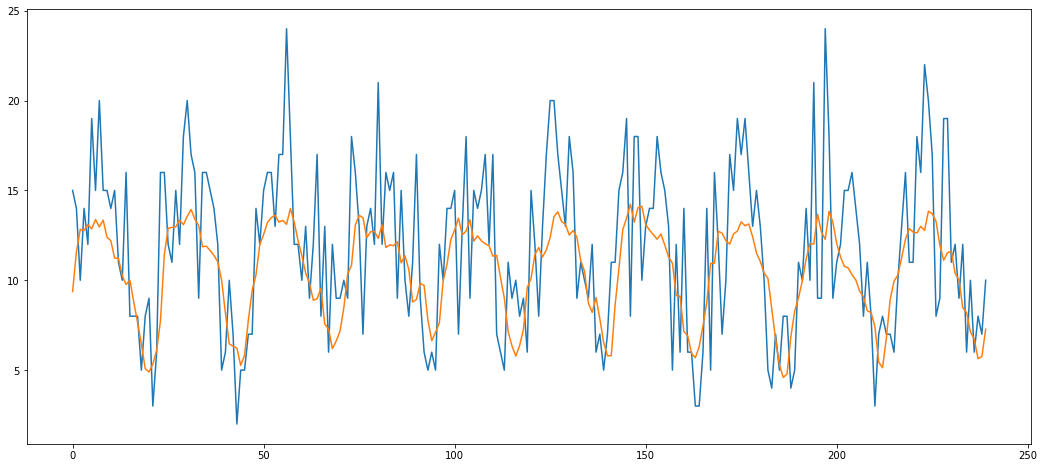

In [475]:
# Prediction
plt.figure(figsize=(18,8))
sns.lineplot(data=test[24:].values[:48*5])
sns.lineplot(data=predictions[:48*5]);

### Running Single LSTM on 15 minute ambulance unavailable data

In [486]:
# Pickling Unavailable Units 2018 df
redo_pickle = False

if redo_pickle == True:
    with open('unavailable_units_15_min_int_counts_2018_df.pickle','wb') as f:
        pickle.dump(unavailable_units_15_min_int_counts_2018_df,f)
        
if redo_pickle == False:
    with open('unavailable_units_15_min_int_counts_2018_df.pickle','rb') as f:
        unavailable_units_15_min_int_counts_2018_df = pickle.load(f)

In [491]:
unavailable_units_15_min_int_counts_2018 = unavailable_units_15_min_int_counts_2018_df['unavail_units']

In [492]:
# Creating 80-20 train-test split
size = int(len(unavailable_units_15_min_int_counts_2018) * 0.8)
train, test = unavailable_units_15_min_int_counts_2018[0:size], unavailable_units_15_min_int_counts_2018[size:]

In [506]:
# univariate lstm example

# choose a number of time steps
n_steps = 12
# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=True)) # return_sequences=True
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features),return_sequences=False)) # return_sequences=True
model.add(Dropout(0.2, input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.25)

Train on 21015 samples, validate on 7005 samples
Epoch 1/10
21015/21015 [==============================] - 34s 2ms/step - loss: 24.4391 - val_loss: 12.7364
Epoch 2/10
21015/21015 [==============================] - 21s 1ms/step - loss: 16.4460 - val_loss: 13.7381
Epoch 3/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.6738 - val_loss: 12.7213
Epoch 4/10
21015/21015 [==============================] - 23s 1ms/step - loss: 15.6983 - val_loss: 12.1838
Epoch 5/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.4542 - val_loss: 11.8684
Epoch 6/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.2162 - val_loss: 12.6125
Epoch 7/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.1328 - val_loss: 14.9880
Epoch 8/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.1832 - val_loss: 13.6732
Epoch 9/10
21015/21015 [==============================] - 22s 1ms/step - loss: 15.1070 - val_lo

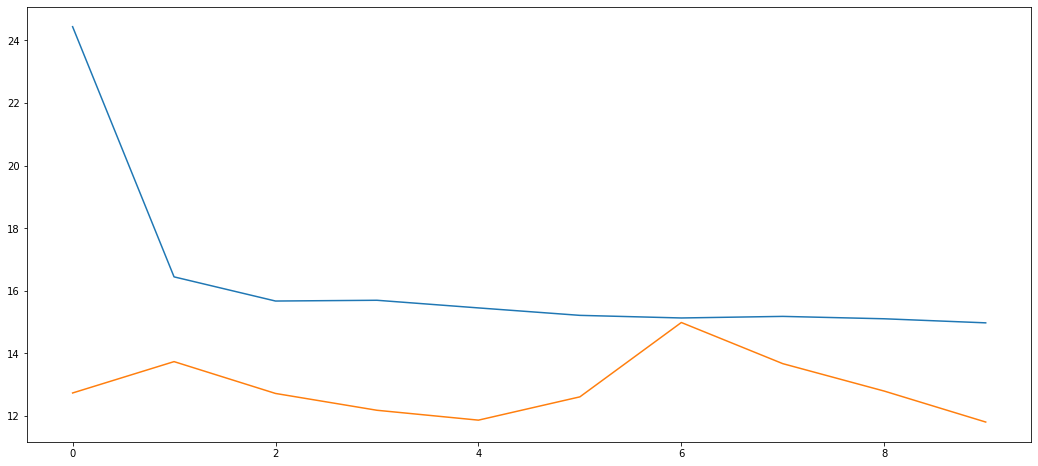

In [507]:
# Train and validation set mse (checking for overfitting)
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [508]:
# Creating prediction for test set
predictions = []
for i in range(size,len(unavailable_units_15_min_int_counts_2018)-12):
    x_input = array(unavailable_units_15_min_int_counts_2018.values[i:i+12])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(i,yhat)
    predictions.append(yhat)

28032 [[8.548082]]
28033 [[13.524714]]
28034 [[14.673153]]
28035 [[16.540606]]
28036 [[13.657055]]
28037 [[15.081443]]
28038 [[12.866388]]
28039 [[10.627995]]
28040 [[7.777555]]
28041 [[8.402279]]
28042 [[8.436304]]
28043 [[10.016161]]
28044 [[6.8141575]]
28045 [[7.0184045]]
28046 [[8.2930765]]
28047 [[10.932723]]
28048 [[7.5337462]]
28049 [[5.7058296]]
28050 [[6.3100057]]
28051 [[5.2722397]]
28052 [[6.4757113]]
28053 [[6.6722956]]
28054 [[9.041461]]
28055 [[12.935706]]
28056 [[11.920925]]
28057 [[11.497261]]
28058 [[13.30394]]
28059 [[15.025428]]
28060 [[20.855164]]
28061 [[21.743536]]
28062 [[16.960564]]
28063 [[18.58945]]
28064 [[14.467134]]
28065 [[16.278564]]
28066 [[15.212385]]
28067 [[15.853575]]
28068 [[12.908702]]
28069 [[15.000566]]
28070 [[15.371923]]
28071 [[18.44244]]
28072 [[19.027996]]
28073 [[19.154696]]
28074 [[14.181333]]
28075 [[15.307567]]
28076 [[13.323238]]
28077 [[13.278953]]
28078 [[10.944686]]
28079 [[13.922483]]
28080 [[15.705845]]
28081 [[14.604195]]
28082 [[

28459 [[23.04528]]
28460 [[22.890856]]
28461 [[24.705233]]
28462 [[26.02328]]
28463 [[26.006779]]
28464 [[23.3949]]
28465 [[22.440681]]
28466 [[22.017221]]
28467 [[21.337578]]
28468 [[19.827242]]
28469 [[24.556946]]
28470 [[22.4699]]
28471 [[20.916552]]
28472 [[20.400375]]
28473 [[20.721844]]
28474 [[16.950724]]
28475 [[18.353752]]
28476 [[20.840557]]
28477 [[20.07456]]
28478 [[24.537054]]
28479 [[21.487425]]
28480 [[21.075302]]
28481 [[24.541994]]
28482 [[23.749777]]
28483 [[21.224524]]
28484 [[20.920465]]
28485 [[17.17576]]
28486 [[11.296007]]
28487 [[10.636057]]
28488 [[11.374107]]
28489 [[14.873836]]
28490 [[12.231968]]
28491 [[12.805201]]
28492 [[11.1521]]
28493 [[10.877582]]
28494 [[7.390591]]
28495 [[6.392989]]
28496 [[10.950941]]
28497 [[13.774083]]
28498 [[13.413687]]
28499 [[11.6514845]]
28500 [[11.153878]]
28501 [[10.467646]]
28502 [[9.690824]]
28503 [[13.443515]]
28504 [[13.141681]]
28505 [[19.263027]]
28506 [[15.631117]]
28507 [[13.048413]]
28508 [[16.601336]]
28509 [[16.3

28874 [[14.334154]]
28875 [[8.076878]]
28876 [[8.792199]]
28877 [[7.4021535]]
28878 [[8.535339]]
28879 [[10.712664]]
28880 [[9.376252]]
28881 [[9.475211]]
28882 [[9.358318]]
28883 [[9.329167]]
28884 [[10.823469]]
28885 [[14.116744]]
28886 [[14.004476]]
28887 [[15.368526]]
28888 [[15.066621]]
28889 [[9.721108]]
28890 [[10.547665]]
28891 [[11.983989]]
28892 [[10.6823]]
28893 [[10.220008]]
28894 [[10.8208065]]
28895 [[9.820204]]
28896 [[7.9230037]]
28897 [[7.634483]]
28898 [[7.5877137]]
28899 [[9.328761]]
28900 [[8.224211]]
28901 [[7.0841384]]
28902 [[9.787349]]
28903 [[11.560317]]
28904 [[8.419225]]
28905 [[9.385314]]
28906 [[8.866336]]
28907 [[7.4210467]]
28908 [[5.098642]]
28909 [[7.165714]]
28910 [[8.278181]]
28911 [[8.289139]]
28912 [[6.538163]]
28913 [[8.917179]]
28914 [[13.052817]]
28915 [[11.167065]]
28916 [[15.176115]]
28917 [[15.018904]]
28918 [[17.197678]]
28919 [[17.80809]]
28920 [[22.24843]]
28921 [[23.00646]]
28922 [[22.828419]]
28923 [[21.27218]]
28924 [[20.718073]]
28925 [

29293 [[7.553971]]
29294 [[8.562201]]
29295 [[10.3563385]]
29296 [[10.983705]]
29297 [[7.7822504]]
29298 [[7.239339]]
29299 [[8.721281]]
29300 [[19.157583]]
29301 [[19.163273]]
29302 [[24.129929]]
29303 [[24.107662]]
29304 [[21.787975]]
29305 [[20.274042]]
29306 [[26.165459]]
29307 [[22.520563]]
29308 [[22.205042]]
29309 [[18.35869]]
29310 [[18.004107]]
29311 [[16.122293]]
29312 [[19.51005]]
29313 [[22.669292]]
29314 [[21.002794]]
29315 [[21.065426]]
29316 [[20.442358]]
29317 [[16.858301]]
29318 [[21.403685]]
29319 [[17.824078]]
29320 [[18.683846]]
29321 [[20.238195]]
29322 [[19.194937]]
29323 [[18.697914]]
29324 [[18.978592]]
29325 [[18.905148]]
29326 [[18.425308]]
29327 [[16.972563]]
29328 [[14.189955]]
29329 [[15.542172]]
29330 [[21.268131]]
29331 [[21.194363]]
29332 [[19.476917]]
29333 [[21.76945]]
29334 [[25.613579]]
29335 [[26.914244]]
29336 [[25.963722]]
29337 [[22.294693]]
29338 [[25.434557]]
29339 [[25.244343]]
29340 [[27.550356]]
29341 [[23.23924]]
29342 [[27.20937]]
29343 [[

29718 [[16.572226]]
29719 [[16.08656]]
29720 [[17.100113]]
29721 [[18.310425]]
29722 [[17.482103]]
29723 [[23.40814]]
29724 [[18.728292]]
29725 [[20.170399]]
29726 [[18.564318]]
29727 [[12.3763685]]
29728 [[12.46323]]
29729 [[15.5873575]]
29730 [[19.353235]]
29731 [[19.381002]]
29732 [[20.376556]]
29733 [[18.39024]]
29734 [[18.346533]]
29735 [[16.864262]]
29736 [[16.39492]]
29737 [[18.404028]]
29738 [[15.103348]]
29739 [[12.651832]]
29740 [[10.08847]]
29741 [[8.051619]]
29742 [[6.3880343]]
29743 [[7.623026]]
29744 [[9.713629]]
29745 [[11.591125]]
29746 [[10.630845]]
29747 [[12.347607]]
29748 [[13.215081]]
29749 [[14.960664]]
29750 [[20.653536]]
29751 [[17.48641]]
29752 [[15.007631]]
29753 [[15.698962]]
29754 [[14.179546]]
29755 [[13.54764]]
29756 [[13.953027]]
29757 [[12.482383]]
29758 [[12.114824]]
29759 [[9.4543705]]
29760 [[9.857973]]
29761 [[7.503927]]
29762 [[10.615669]]
29763 [[11.627732]]
29764 [[9.868908]]
29765 [[8.534099]]
29766 [[9.164573]]
29767 [[7.1805224]]
29768 [[6.2881

30136 [[17.271914]]
30137 [[16.40049]]
30138 [[17.843689]]
30139 [[15.564128]]
30140 [[17.428251]]
30141 [[17.12522]]
30142 [[15.304661]]
30143 [[14.35978]]
30144 [[13.237105]]
30145 [[14.311164]]
30146 [[13.998367]]
30147 [[10.869725]]
30148 [[7.5819826]]
30149 [[8.099717]]
30150 [[9.009632]]
30151 [[6.217416]]
30152 [[7.02175]]
30153 [[5.0222955]]
30154 [[4.89562]]
30155 [[6.919542]]
30156 [[8.09693]]
30157 [[10.879508]]
30158 [[13.592423]]
30159 [[21.215172]]
30160 [[18.913061]]
30161 [[19.756693]]
30162 [[18.173183]]
30163 [[17.356127]]
30164 [[13.998583]]
30165 [[10.504066]]
30166 [[12.858762]]
30167 [[12.233236]]
30168 [[14.956864]]
30169 [[13.233782]]
30170 [[16.530138]]
30171 [[17.372208]]
30172 [[16.51255]]
30173 [[19.715479]]
30174 [[19.310738]]
30175 [[16.792604]]
30176 [[18.96785]]
30177 [[17.188414]]
30178 [[22.838572]]
30179 [[20.558077]]
30180 [[23.535555]]
30181 [[20.589254]]
30182 [[20.100828]]
30183 [[21.110342]]
30184 [[21.668474]]
30185 [[23.41479]]
30186 [[24.37639

30563 [[22.801003]]
30564 [[24.634169]]
30565 [[28.907366]]
30566 [[28.494247]]
30567 [[23.152452]]
30568 [[22.838919]]
30569 [[22.293718]]
30570 [[20.786974]]
30571 [[22.038698]]
30572 [[19.992527]]
30573 [[24.357508]]
30574 [[23.831507]]
30575 [[24.279041]]
30576 [[21.960926]]
30577 [[21.036858]]
30578 [[22.667385]]
30579 [[23.857658]]
30580 [[23.004614]]
30581 [[22.010828]]
30582 [[23.158453]]
30583 [[21.626122]]
30584 [[24.794052]]
30585 [[21.108574]]
30586 [[19.354813]]
30587 [[21.267076]]
30588 [[22.408607]]
30589 [[22.217579]]
30590 [[21.181429]]
30591 [[19.144613]]
30592 [[18.683773]]
30593 [[19.553202]]
30594 [[21.065105]]
30595 [[18.809137]]
30596 [[23.675093]]
30597 [[22.031551]]
30598 [[24.642096]]
30599 [[21.619944]]
30600 [[20.958559]]
30601 [[23.924555]]
30602 [[20.184261]]
30603 [[21.679897]]
30604 [[22.11453]]
30605 [[21.533028]]
30606 [[25.601486]]
30607 [[20.385336]]
30608 [[19.923502]]
30609 [[17.08573]]
30610 [[12.914648]]
30611 [[11.520638]]
30612 [[14.574258]]
30

30977 [[17.695154]]
30978 [[16.676832]]
30979 [[13.798496]]
30980 [[12.814643]]
30981 [[16.630281]]
30982 [[20.425425]]
30983 [[24.159302]]
30984 [[23.745615]]
30985 [[18.841478]]
30986 [[18.856066]]
30987 [[16.972889]]
30988 [[15.460294]]
30989 [[14.918779]]
30990 [[15.272507]]
30991 [[18.732634]]
30992 [[20.315275]]
30993 [[16.330679]]
30994 [[15.375966]]
30995 [[12.317097]]
30996 [[9.691328]]
30997 [[8.632519]]
30998 [[11.251545]]
30999 [[14.589339]]
31000 [[13.606228]]
31001 [[11.834159]]
31002 [[10.503804]]
31003 [[10.396918]]
31004 [[8.896063]]
31005 [[8.010853]]
31006 [[12.321801]]
31007 [[12.342586]]
31008 [[11.005172]]
31009 [[9.506093]]
31010 [[9.281983]]
31011 [[9.439915]]
31012 [[8.793316]]
31013 [[10.36487]]
31014 [[7.680886]]
31015 [[7.999535]]
31016 [[7.739772]]
31017 [[5.661211]]
31018 [[9.47832]]
31019 [[11.718516]]
31020 [[10.939931]]
31021 [[13.472771]]
31022 [[12.462446]]
31023 [[10.918048]]
31024 [[9.650808]]
31025 [[9.038936]]
31026 [[12.175034]]
31027 [[12.432504

31392 [[8.251201]]
31393 [[8.567796]]
31394 [[9.668932]]
31395 [[8.840639]]
31396 [[7.810339]]
31397 [[7.7403693]]
31398 [[6.1757336]]
31399 [[6.836041]]
31400 [[9.312422]]
31401 [[8.20005]]
31402 [[10.320759]]
31403 [[9.08592]]
31404 [[6.57982]]
31405 [[8.890754]]
31406 [[12.878517]]
31407 [[12.279443]]
31408 [[8.894217]]
31409 [[11.193662]]
31410 [[11.938522]]
31411 [[10.227284]]
31412 [[8.289327]]
31413 [[8.686625]]
31414 [[6.736171]]
31415 [[7.2945046]]
31416 [[7.751836]]
31417 [[9.532717]]
31418 [[9.828446]]
31419 [[11.330221]]
31420 [[10.439209]]
31421 [[17.203382]]
31422 [[17.19275]]
31423 [[15.748547]]
31424 [[17.706438]]
31425 [[16.981066]]
31426 [[21.523005]]
31427 [[19.133106]]
31428 [[16.000597]]
31429 [[15.428234]]
31430 [[14.809388]]
31431 [[13.038799]]
31432 [[14.555234]]
31433 [[16.639187]]
31434 [[20.044918]]
31435 [[24.659681]]
31436 [[27.395031]]
31437 [[21.7296]]
31438 [[20.434784]]
31439 [[18.93346]]
31440 [[14.918938]]
31441 [[17.655586]]
31442 [[14.044192]]
31443

31808 [[12.618218]]
31809 [[13.273242]]
31810 [[16.069147]]
31811 [[19.473244]]
31812 [[15.976122]]
31813 [[17.07035]]
31814 [[23.09702]]
31815 [[19.544235]]
31816 [[17.841232]]
31817 [[19.378584]]
31818 [[23.303286]]
31819 [[22.09955]]
31820 [[22.779549]]
31821 [[27.980198]]
31822 [[23.637796]]
31823 [[26.955763]]
31824 [[25.050703]]
31825 [[19.973234]]
31826 [[18.947468]]
31827 [[20.50619]]
31828 [[20.336239]]
31829 [[16.60526]]
31830 [[15.821688]]
31831 [[18.589422]]
31832 [[17.08466]]
31833 [[24.210463]]
31834 [[22.973747]]
31835 [[27.799833]]
31836 [[24.380894]]
31837 [[24.210766]]
31838 [[23.386494]]
31839 [[21.325]]
31840 [[17.756294]]
31841 [[18.353554]]
31842 [[18.453836]]
31843 [[22.109625]]
31844 [[22.30045]]
31845 [[25.601715]]
31846 [[25.823627]]
31847 [[21.838049]]
31848 [[20.369806]]
31849 [[16.828047]]
31850 [[15.231116]]
31851 [[16.500072]]
31852 [[16.591717]]
31853 [[17.025938]]
31854 [[14.194439]]
31855 [[17.066051]]
31856 [[23.427399]]
31857 [[24.471767]]
31858 [[22

32229 [[20.645277]]
32230 [[20.570572]]
32231 [[21.959423]]
32232 [[21.006145]]
32233 [[19.250486]]
32234 [[17.648909]]
32235 [[19.53307]]
32236 [[18.715176]]
32237 [[19.334085]]
32238 [[23.36312]]
32239 [[20.080847]]
32240 [[20.380554]]
32241 [[18.5219]]
32242 [[16.931442]]
32243 [[13.407353]]
32244 [[14.093493]]
32245 [[11.489598]]
32246 [[8.48021]]
32247 [[9.365344]]
32248 [[9.614251]]
32249 [[11.724544]]
32250 [[15.023464]]
32251 [[13.315346]]
32252 [[12.307065]]
32253 [[11.880365]]
32254 [[9.835264]]
32255 [[7.359015]]
32256 [[5.9095745]]
32257 [[8.840058]]
32258 [[10.632249]]
32259 [[12.400063]]
32260 [[12.842778]]
32261 [[12.1186495]]
32262 [[11.927129]]
32263 [[11.196707]]
32264 [[16.596027]]
32265 [[20.169788]]
32266 [[18.778603]]
32267 [[16.338266]]
32268 [[14.100916]]
32269 [[11.317449]]
32270 [[10.3474045]]
32271 [[8.632701]]
32272 [[7.6134872]]
32273 [[9.559901]]
32274 [[10.240029]]
32275 [[11.398314]]
32276 [[14.762262]]
32277 [[17.094162]]
32278 [[17.38512]]
32279 [[21.9

32650 [[8.566026]]
32651 [[9.203424]]
32652 [[8.530394]]
32653 [[8.220936]]
32654 [[8.783239]]
32655 [[7.845862]]
32656 [[6.2699394]]
32657 [[5.348332]]
32658 [[4.2190204]]
32659 [[5.552128]]
32660 [[9.016787]]
32661 [[12.483996]]
32662 [[12.69665]]
32663 [[12.639045]]
32664 [[16.878899]]
32665 [[18.494188]]
32666 [[21.237818]]
32667 [[29.052822]]
32668 [[32.114586]]
32669 [[33.443733]]
32670 [[32.046272]]
32671 [[31.59583]]
32672 [[26.16295]]
32673 [[25.263077]]
32674 [[22.992573]]
32675 [[21.796167]]
32676 [[21.059965]]
32677 [[24.253431]]
32678 [[26.448725]]
32679 [[24.786526]]
32680 [[24.512102]]
32681 [[24.103527]]
32682 [[24.025463]]
32683 [[21.70523]]
32684 [[26.251553]]
32685 [[28.27487]]
32686 [[26.758535]]
32687 [[28.371931]]
32688 [[28.79626]]
32689 [[27.02714]]
32690 [[29.404491]]
32691 [[26.532919]]
32692 [[25.977444]]
32693 [[27.119118]]
32694 [[23.708742]]
32695 [[27.03398]]
32696 [[23.250967]]
32697 [[21.286182]]
32698 [[20.40956]]
32699 [[20.052242]]
32700 [[18.725044]

33073 [[28.186085]]
33074 [[28.999237]]
33075 [[35.883022]]
33076 [[27.061451]]
33077 [[28.319626]]
33078 [[26.917227]]
33079 [[23.5949]]
33080 [[22.153255]]
33081 [[23.130812]]
33082 [[21.414383]]
33083 [[19.653751]]
33084 [[22.226875]]
33085 [[23.331772]]
33086 [[24.0737]]
33087 [[27.282166]]
33088 [[25.142853]]
33089 [[22.999338]]
33090 [[20.557205]]
33091 [[19.85304]]
33092 [[19.809393]]
33093 [[21.870779]]
33094 [[20.514242]]
33095 [[21.170397]]
33096 [[19.14712]]
33097 [[20.696505]]
33098 [[19.397123]]
33099 [[19.328499]]
33100 [[23.923134]]
33101 [[24.694323]]
33102 [[22.782688]]
33103 [[21.244772]]
33104 [[18.190681]]
33105 [[17.625013]]
33106 [[18.595308]]
33107 [[20.398804]]
33108 [[20.69846]]
33109 [[22.415052]]
33110 [[18.108715]]
33111 [[16.597673]]
33112 [[12.320025]]
33113 [[14.388967]]
33114 [[10.086671]]
33115 [[7.4066157]]
33116 [[7.1542525]]
33117 [[6.1771183]]
33118 [[9.075899]]
33119 [[8.108191]]
33120 [[8.6568575]]
33121 [[9.304231]]
33122 [[7.8046837]]
33123 [[9.

33496 [[22.486034]]
33497 [[15.2660885]]
33498 [[15.533799]]
33499 [[16.99151]]
33500 [[17.570532]]
33501 [[12.767098]]
33502 [[13.572045]]
33503 [[15.842847]]
33504 [[15.408668]]
33505 [[14.974259]]
33506 [[18.090933]]
33507 [[17.33756]]
33508 [[19.205772]]
33509 [[15.564096]]
33510 [[11.0960455]]
33511 [[7.748612]]
33512 [[8.057296]]
33513 [[7.780088]]
33514 [[9.132731]]
33515 [[10.793081]]
33516 [[11.53569]]
33517 [[7.535041]]
33518 [[8.995202]]
33519 [[11.65663]]
33520 [[8.476673]]
33521 [[11.279409]]
33522 [[9.656536]]
33523 [[9.225675]]
33524 [[9.740888]]
33525 [[12.112954]]
33526 [[14.428684]]
33527 [[14.828847]]
33528 [[12.83221]]
33529 [[11.533774]]
33530 [[10.519208]]
33531 [[9.987226]]
33532 [[12.132232]]
33533 [[11.446588]]
33534 [[15.65953]]
33535 [[18.657442]]
33536 [[14.511137]]
33537 [[17.390629]]
33538 [[18.835867]]
33539 [[17.68729]]
33540 [[14.634084]]
33541 [[20.23187]]
33542 [[18.454582]]
33543 [[26.298557]]
33544 [[23.126974]]
33545 [[24.770927]]
33546 [[21.960344

33914 [[19.76534]]
33915 [[22.15077]]
33916 [[20.448202]]
33917 [[20.553526]]
33918 [[19.694092]]
33919 [[17.078259]]
33920 [[20.137592]]
33921 [[22.18871]]
33922 [[26.680696]]
33923 [[25.690779]]
33924 [[20.995817]]
33925 [[25.450851]]
33926 [[25.735016]]
33927 [[23.746119]]
33928 [[24.675144]]
33929 [[20.75481]]
33930 [[18.590565]]
33931 [[16.44696]]
33932 [[15.724866]]
33933 [[16.532951]]
33934 [[21.235209]]
33935 [[19.5063]]
33936 [[24.891747]]
33937 [[21.736156]]
33938 [[23.817574]]
33939 [[19.665028]]
33940 [[18.420574]]
33941 [[20.734768]]
33942 [[21.572334]]
33943 [[20.982134]]
33944 [[23.854813]]
33945 [[20.430279]]
33946 [[19.680922]]
33947 [[19.87592]]
33948 [[16.69313]]
33949 [[15.9621]]
33950 [[17.79656]]
33951 [[14.501265]]
33952 [[14.694571]]
33953 [[16.866789]]
33954 [[17.809813]]
33955 [[17.932196]]
33956 [[15.578154]]
33957 [[19.001411]]
33958 [[17.502745]]
33959 [[16.656233]]
33960 [[16.34128]]
33961 [[22.84737]]
33962 [[18.457798]]
33963 [[16.252882]]
33964 [[12.066

34354 [[15.117378]]
34355 [[16.603945]]
34356 [[17.836311]]
34357 [[19.59923]]
34358 [[12.399143]]
34359 [[11.842684]]
34360 [[10.721183]]
34361 [[16.66609]]
34362 [[17.721352]]
34363 [[14.847194]]
34364 [[9.153017]]
34365 [[11.40949]]
34366 [[14.172689]]
34367 [[12.557118]]
34368 [[13.445337]]
34369 [[8.271184]]
34370 [[6.731107]]
34371 [[8.172189]]
34372 [[6.8232536]]
34373 [[6.4912004]]
34374 [[6.8592253]]
34375 [[7.936699]]
34376 [[6.3379602]]
34377 [[6.066112]]
34378 [[10.13229]]
34379 [[8.50756]]
34380 [[12.305851]]
34381 [[15.710437]]
34382 [[14.081995]]
34383 [[9.367771]]
34384 [[10.621339]]
34385 [[12.053665]]
34386 [[15.41284]]
34387 [[15.759395]]
34388 [[13.330522]]
34389 [[13.190335]]
34390 [[20.0598]]
34391 [[14.04537]]
34392 [[13.334551]]
34393 [[12.046917]]
34394 [[14.189408]]
34395 [[12.416643]]
34396 [[11.340721]]
34397 [[13.530712]]
34398 [[15.3069]]
34399 [[16.492186]]
34400 [[15.702615]]
34401 [[14.215611]]
34402 [[14.711177]]
34403 [[15.582397]]
34404 [[16.160824]]

34771 [[9.143108]]
34772 [[12.452237]]
34773 [[18.513857]]
34774 [[18.941418]]
34775 [[17.931705]]
34776 [[15.528461]]
34777 [[12.136736]]
34778 [[14.932319]]
34779 [[12.246945]]
34780 [[12.807325]]
34781 [[14.835313]]
34782 [[21.63641]]
34783 [[19.253166]]
34784 [[18.872877]]
34785 [[17.90968]]
34786 [[19.356241]]
34787 [[23.302183]]
34788 [[27.361835]]
34789 [[26.537264]]
34790 [[27.206997]]
34791 [[24.395817]]
34792 [[23.133541]]
34793 [[17.042004]]
34794 [[19.82671]]
34795 [[19.942816]]
34796 [[17.99774]]
34797 [[18.74919]]
34798 [[13.864428]]
34799 [[10.841205]]
34800 [[13.6717]]
34801 [[16.213802]]
34802 [[22.454258]]
34803 [[21.458418]]
34804 [[17.408873]]
34805 [[15.307213]]
34806 [[13.7060995]]
34807 [[12.2802]]
34808 [[17.696712]]
34809 [[22.163305]]
34810 [[18.755138]]
34811 [[16.894848]]
34812 [[13.223093]]
34813 [[8.946742]]
34814 [[9.432165]]
34815 [[15.603117]]
34816 [[12.265401]]
34817 [[17.825459]]
34818 [[24.215199]]
34819 [[27.216599]]
34820 [[27.396944]]
34821 [[27.

In [509]:
predictions = array(predictions).reshape((len(predictions)))

In [511]:
# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test[12:],predictions)
print('Test MSE: %.3f' % error)

Test MSE: 12.661


In [ ]:
# check residuals for nonlinear trend then it will show if you need to use an rnn

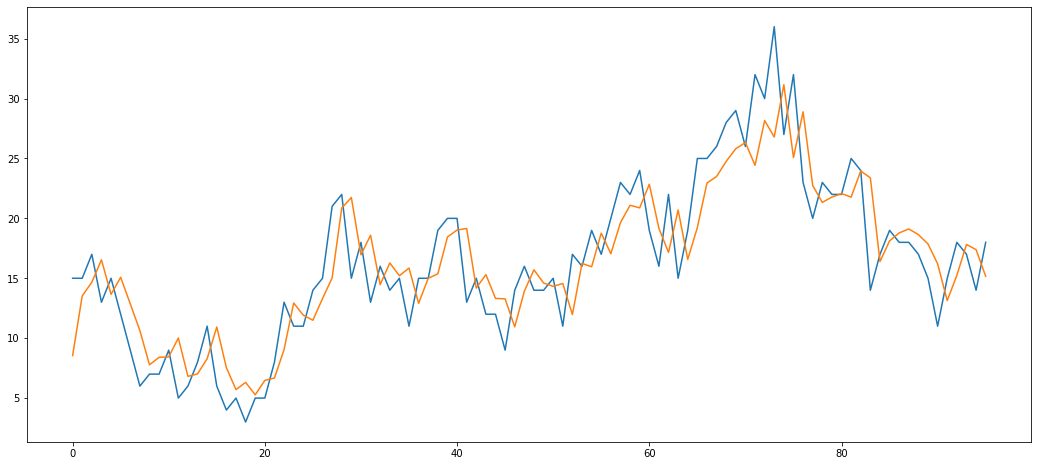

In [513]:
# Prediction
plt.figure(figsize=(18,8))
sns.lineplot(data=test[12:].values[:4*24])
sns.lineplot(data=predictions[:4*24]);

In [499]:
16.5**(1/2)

4.06201920231798

In [518]:
test

Hourly_DtTm
2015-08-04 08:00:00    14
2015-08-04 09:00:00    17
2015-08-04 10:00:00    17
2015-08-04 11:00:00    18
2015-08-04 12:00:00    16
2015-08-04 13:00:00    19
2015-08-04 14:00:00    17
2015-08-04 15:00:00    15
2015-08-04 16:00:00    22
2015-08-04 17:00:00     9
2015-08-04 18:00:00    21
2015-08-04 19:00:00     7
2015-08-04 20:00:00    14
2015-08-04 21:00:00     8
2015-08-04 22:00:00     9
2015-08-04 23:00:00    12
2015-08-05 00:00:00     8
2015-08-05 01:00:00     7
2015-08-05 02:00:00     6
2015-08-05 03:00:00     2
2015-08-05 04:00:00     6
2015-08-05 05:00:00     3
2015-08-05 06:00:00     5
2015-08-05 07:00:00     5
2015-08-05 08:00:00    15
2015-08-05 09:00:00    14
2015-08-05 10:00:00    10
2015-08-05 11:00:00    14
2015-08-05 12:00:00    12
2015-08-05 13:00:00    19
                       ..
2019-05-29 18:00:00    14
2019-05-29 19:00:00     9
2019-05-29 20:00:00    15
2019-05-29 21:00:00     9
2019-05-29 22:00:00    12
2019-05-29 23:00:00     3
2019-05-30 00:00:00     3


In [520]:
x_input.shape

(1, 12, 1)